## BFSI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_data= pd.read_csv('application_data.csv')
previous_application_data= pd.read_csv('previous_application.csv')


## 1. Distribution of Genders


In [3]:
application_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [4]:
application_data[application_data['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [5]:
gender_mode = application_data['CODE_GENDER'].mode()[0]
# Replace 'XNA' with the mode
application_data['CODE_GENDER'] = application_data['CODE_GENDER'].replace('XNA', gender_mode)
# Verify that 'XNA' is replaced
print(application_data['CODE_GENDER'].value_counts())


CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64


## Gender wise distribution

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64
CODE_GENDER
F    65.835694
M    34.164306
Name: count, dtype: float64


<Axes: ylabel='count'>

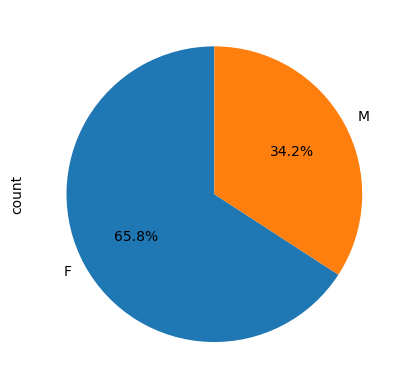

In [6]:
gender_distribution=application_data['CODE_GENDER'].value_counts()
gender_percentage = (gender_distribution / gender_distribution.sum()) * 100

print(gender_distribution)
print(gender_percentage)

gender_distribution.plot(kind='pie',startangle=90,autopct='%1.1f%%')  


#### In-term of applications submission, The dataset shows a significantly higher representation of females compared to males, with females making up approximately 66% of the total, while males account for around 34%.

## Gender-Target bivariate analysis

TARGET            0      1
CODE_GENDER               
F            188282  14170
M             94404  10655


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\2740182891.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, total + 2000, f'{percentage_defaults[i]:.2f}%', ha='center')


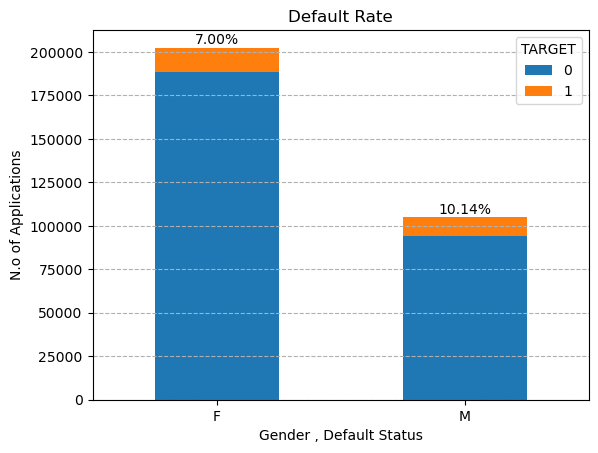

In [7]:
gen_tar_bivariate=application_data.groupby(['CODE_GENDER','TARGET'])['SK_ID_CURR'].count()
gen_tar_bivariate = gen_tar_bivariate.unstack()
total_applications = gen_tar_bivariate.sum(axis=1)
percentage_defaults = (gen_tar_bivariate[1] / total_applications) * 100  # assuming 1 represents default

print(gen_tar_bivariate)

gen_tar_bivariate.plot(kind='bar',stacked=True)
plt.title('Default Rate')
plt.xlabel('Gender , Default Status')
plt.ylabel('N.o of Applications')
plt.xticks(rotation=0,ha='center')
plt.grid(True, linestyle='--',axis='y')

for i, total in enumerate(total_applications):
    plt.text(i, total + 2000, f'{percentage_defaults[i]:.2f}%', ha='center')

plt.show()



## considring the dafault status data and gender wise distribution 

- **Females**: Out of 202,452 applications, 188,282 (about 93%) did not default, while 14,170 (about 7%) defaulted.
- **Males**: Out of 105,059 applications, 94,404 (around 89%) did not default, while 10,655 (around 11%) defaulteales.

## Gender-Contract_type bivariate analysis

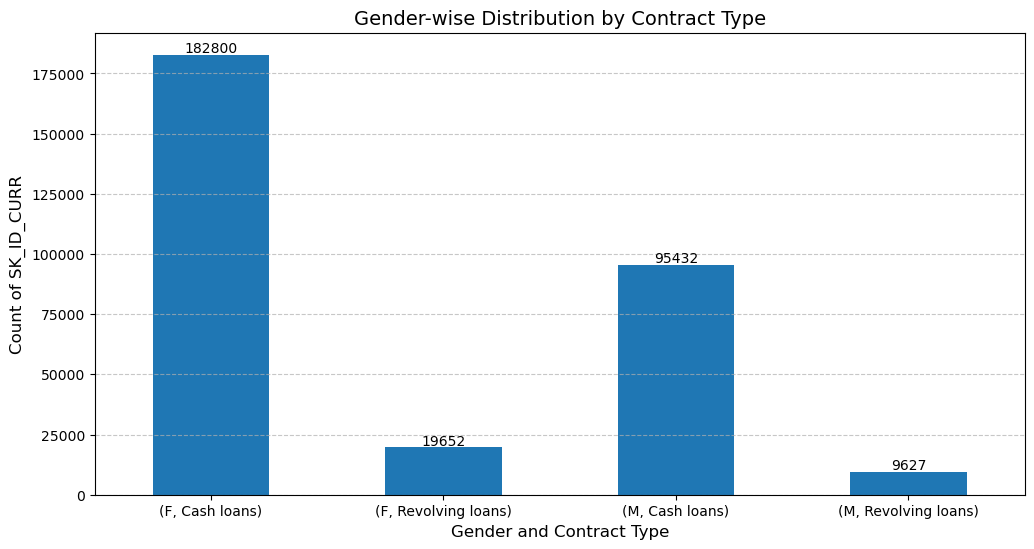

In [8]:
gender_contract_bivariate = application_data.groupby(['CODE_GENDER', 'NAME_CONTRACT_TYPE'])['SK_ID_CURR'].count()

plt.figure(figsize=(12, 6))
gender_contract_bivariate.plot(kind='bar')

plt.title('Gender-wise Distribution by Contract Type', fontsize=14)
plt.ylabel('Count of SK_ID_CURR', fontsize=12)
plt.xlabel('Gender and Contract Type', fontsize=12)

plt.xticks(rotation=0, ha='center')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(gender_contract_bivariate):
    plt.text(i, value + 1000, str(value), ha='center', fontsize=10)

plt.show()



- **Females** have significantly more loans overall, with **182,800 cash loans** and **19,652 revolving loans**, compared to **males** with **95,432 cash loans** and **9,627 revolving loans**.
- Both genders show a strong preference for **cash loans** over revolving loans. For both, about **90%** of loans are cash loans, with only **10%** being revolving loans.
- Females dominate in both loan types, having nearly **twice the number of loans** as males in both categoriescants.

## Gender-Wise Credited Amount

CODE_GENDER
F    592762.896316
M    611095.197084
Name: AMT_CREDIT, dtype: float64


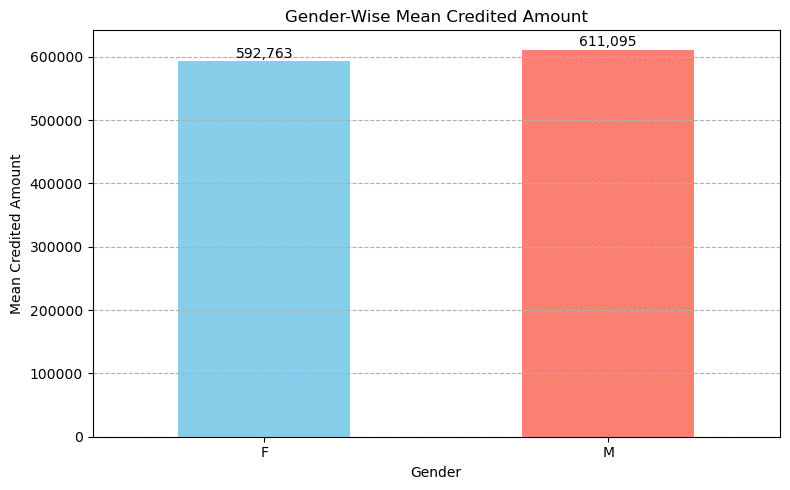

In [9]:
gen_amt_bivariate = application_data.groupby(['CODE_GENDER'])['AMT_CREDIT'].mean()

total_amount = gen_amt_bivariate.mean()
amt_percentage = (gen_amt_bivariate / total_amount) * 100

print(gen_amt_bivariate)

plt.figure(figsize=(8, 5))
gen_amt_bivariate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender-Wise Mean Credited Amount')
plt.xlabel('Gender')
plt.ylabel('Mean Credited Amount')
plt.xticks(rotation=0, ha='center')
plt.grid(True, linestyle='--', axis='y')

for i, total in enumerate(gen_amt_bivariate):
    plt.text(i, total + (0.01 * total), f'{total:,.0f}', ha='center')  

plt.tight_layout()
plt.show()


## Application Weekday

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64
WEEKDAY_APPR_PROCESS_START
TUESDAY      17.528153
WEDNESDAY    16.888502
MONDAY       16.491768
THURSDAY     16.451769
FRIDAY       16.369496
SATURDAY     11.008387
SUNDAY        5.261926
Name: count, dtype: float64


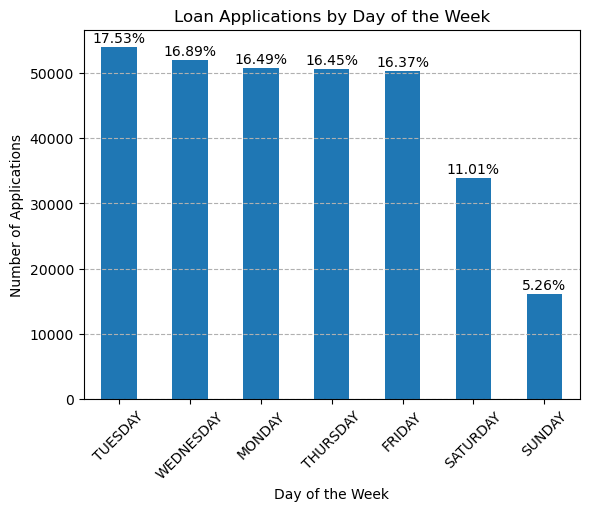

In [10]:
weekday_distribution = application_data['WEEKDAY_APPR_PROCESS_START'].value_counts()
weekday_percentage = (weekday_distribution / weekday_distribution.sum()) * 100

print(weekday_distribution)
print(weekday_percentage)


weekday_distribution.plot(kind='bar')
plt.title('Loan Applications by Day of the Week')
plt.ylabel('Number of Applications')
plt.xlabel('Day of the Week')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=45, ha='center')

for i, value in enumerate(weekday_percentage):
    plt.text(i, weekday_distribution.values[i] + 700, f'{value:.2f}%', ha='center')

plt.show()


## Occupation Type Distribution

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960

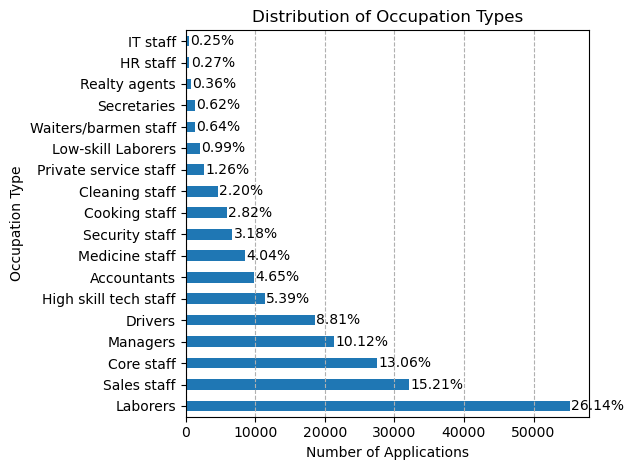

In [11]:
# Univariate analysis for OCCUPATION_TYPE
occupation_distribution = application_data['OCCUPATION_TYPE'].value_counts()
occupation_percentage = (occupation_distribution / occupation_distribution.sum()) * 100

print(occupation_distribution)
print(occupation_percentage)

occupation_distribution.plot(kind='barh') 
plt.title('Distribution of Occupation Types')
plt.xlabel('Number of Applications')  
plt.ylabel('Occupation Type')
plt.grid(True, axis='x', linestyle='--')  
plt.xticks(rotation=0)

for i, value in enumerate(occupation_percentage):
    plt.text(occupation_distribution.values[i] + 200, i, f'{value:.2f}%', va='center')  

plt.tight_layout()  
plt.show()


TARGET                         0          1
OCCUPATION_TYPE                            
Accountants            95.169673   4.830327
Cleaning staff         90.393295   9.606705
Cooking staff          89.556004  10.443996
Core staff             93.696046   6.303954
Drivers                88.673870  11.326130
HR staff               93.605684   6.394316
High skill tech staff  93.840070   6.159930
IT staff               93.536122   6.463878
Laborers               89.421230  10.578770
Low-skill Laborers     82.847587  17.152413
Managers               93.785972   6.214028
Medicine staff         93.299754   6.700246
Private service staff  93.401207   6.598793
Realty agents          92.143808   7.856192
Sales staff            90.368201   9.631799
Secretaries            92.950192   7.049808
Security staff         89.257551  10.742449
Waiters/barmen staff   88.724036  11.275964


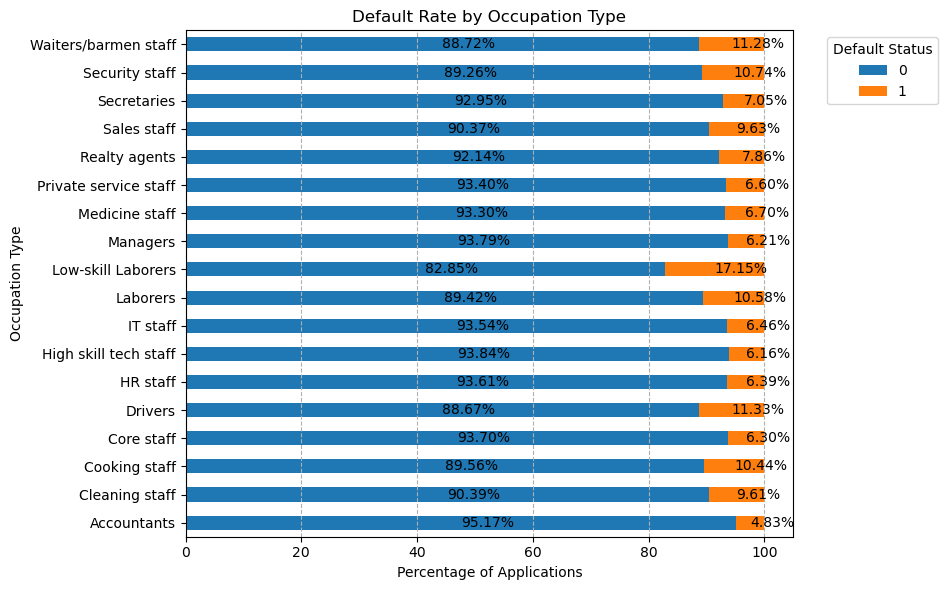

In [12]:
occupation_default_rate = application_data.groupby('OCCUPATION_TYPE')['TARGET'].value_counts(normalize=True).unstack() * 100

print(occupation_default_rate)

occupation_default_rate.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Default Rate by Occupation Type')
plt.xlabel('Percentage of Applications')
plt.ylabel('Occupation Type')
plt.grid(True, axis='x', linestyle='--')
plt.legend(title='Default Status', loc='upper right', bbox_to_anchor=(1.25, 1))

for index, (non_default, default) in enumerate(zip(occupation_default_rate[0], occupation_default_rate[1])):
    plt.text(non_default / 2, index, f'{non_default:.2f}%', va='center', color='black')
    plt.text(non_default + (default / 2), index, f'{default:.2f}%', va='center', color='black')

plt.tight_layout()
plt.show()


Overall Trends:

Higher default rates are observed in lower-skilled occupations.
Professional occupations (e.g., Accountants, Managers) show significantly lower default rates.


## House Type Distribution

TARGET                       0          1
NAME_HOUSING_TYPE                        
Co-op apartment      92.067736   7.932264
House / apartment    92.204289   7.795711
Municipal apartment  91.460252   8.539748
Office apartment     93.427589   6.572411
Rented apartment     87.686949  12.313051
With parents         88.301887  11.698113


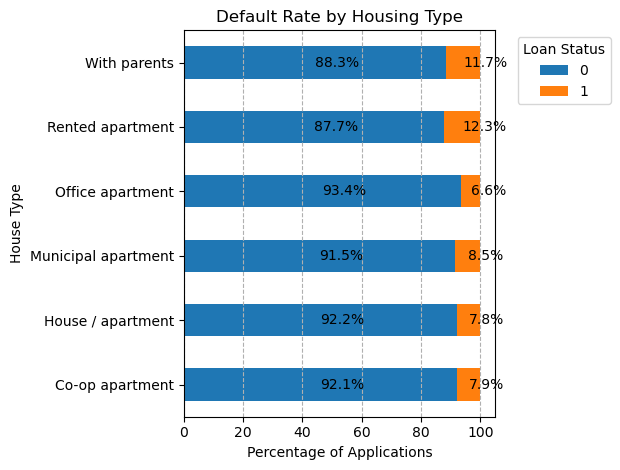

In [13]:
house_type_default_rate = application_data.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts(normalize=True).unstack() * 100
print(house_type_default_rate)



house_type_default_rate.plot(kind='barh', stacked=True)
plt.title('Default Rate by Housing Type')
plt.xlabel('Percentage of Applications')
plt.ylabel('House Type')
plt.grid(True, axis='x', linestyle='--')

plt.legend(title='Loan Status', loc='upper left', bbox_to_anchor=(1.05, 1))

for index, (non_default, default) in enumerate(zip(house_type_default_rate[0], house_type_default_rate[1])):
    plt.text(non_default / 2, index, f'{non_default:.1f}%', va='center', color='black')
    plt.text(non_default + (default / 2), index, f'{default:.1f}%', va='center', color='black')

plt.tight_layout()
plt.show()


Rented Apartments: Higher default rates may indicate financial instability or greater rent burdens.

Ownership vs. Rental: Owned housing types show lower default rates, indicating more stable financial conditions.

General Trend: Higher default rates among renters and those living with parents indicate greater economic vulnerability compared to homeowners.

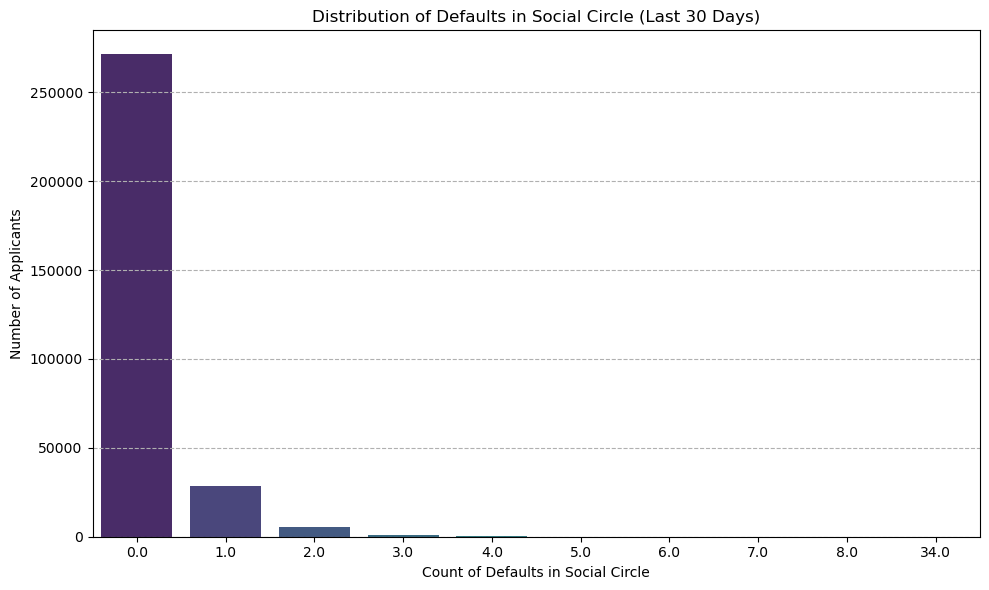

DEF_30_CNT_SOCIAL_CIRCLE
0.0      7.775943
1.0     10.145439
2.0     11.647567
3.0     12.835570
4.0     13.833992
5.0     14.285714
6.0      9.090909
7.0      0.000000
8.0      0.000000
34.0     0.000000
Name: TARGET, dtype: float64


In [14]:
# Count the number of applicants by DEF_30_CNT_SOCIAL_CIRCLE
social_circle_distribution = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=social_circle_distribution.index, y=social_circle_distribution.values, palette='viridis')
plt.title('Distribution of Defaults in Social Circle (Last 30 Days)')
plt.xlabel('Count of Defaults in Social Circle')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

# Default rate by DEF_30_CNT_SOCIAL_CIRCLE
default_rate = application_data.groupby('DEF_30_CNT_SOCIAL_CIRCLE')['TARGET'].mean() * 100
print(default_rate)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\3696994520.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = application_data.groupby('Bureau_Request_Band')['TARGET'].mean() * 100
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\3696994520.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_requests = application_data.groupby('Bureau_Request_Band')['AMT_REQ_CREDIT_BUREAU_DAY'].mean()
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

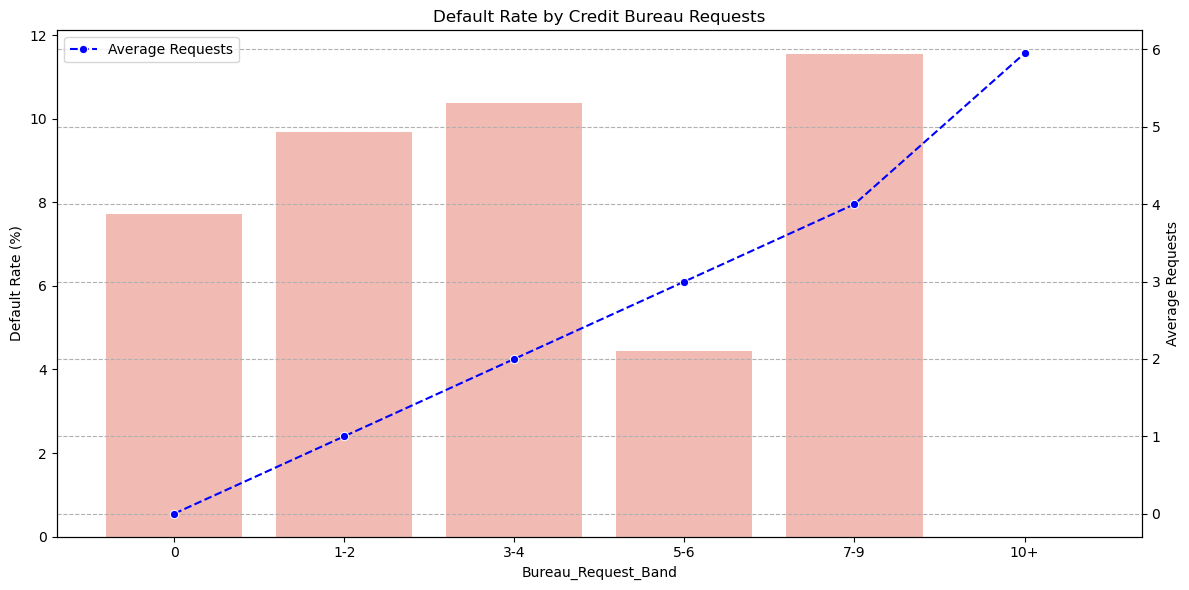

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for AMT_REQ_CREDIT_BUREAU_DAY
bins = [0, 1, 2, 3, 4, 5, 10]  # Adjust bins as necessary
labels = ['0', '1-2', '3-4', '5-6', '7-9', '10+']
application_data['Bureau_Request_Band'] = pd.cut(application_data['AMT_REQ_CREDIT_BUREAU_DAY'], bins=bins, labels=labels, right=False)

# Calculate default rate for each band
default_rate = application_data.groupby('Bureau_Request_Band')['TARGET'].mean() * 100
avg_requests = application_data.groupby('Bureau_Request_Band')['AMT_REQ_CREDIT_BUREAU_DAY'].mean()

# Create a DataFrame for easier plotting
bivariate_data = pd.DataFrame({
    'Default Rate (%)': default_rate,
    'Average Requests': avg_requests
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=bivariate_data, x='Bureau_Request_Band', y='Default Rate (%)', color='salmon', alpha=0.6, label='Default Rate (%)')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Credit Bureau Requests')
plt.twinx()  # Create a second y-axis
sns.lineplot(data=bivariate_data, x='Bureau_Request_Band', y='Average Requests', color='blue', marker='o', label='Average Requests', linestyle='--')

# Customize the plot
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# previous application data

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64
NAME_PAYMENT_TYPE
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: count, dtype: float64


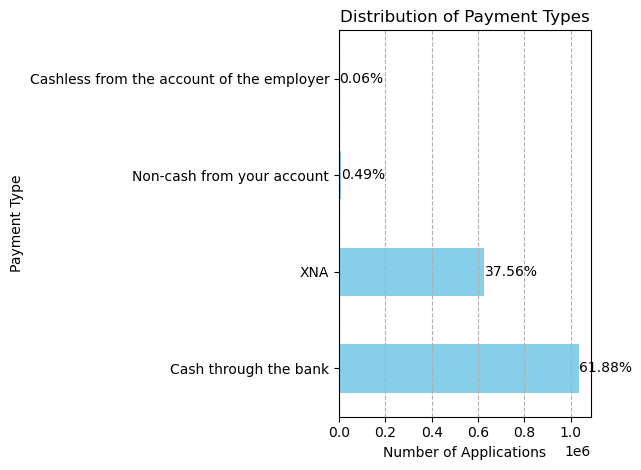

In [16]:
payment_type_distribution = previous_application_data['NAME_PAYMENT_TYPE'].value_counts()
payment_type_percentage = (payment_type_distribution / payment_type_distribution.sum()) * 100

print(payment_type_distribution)
print(payment_type_percentage)

payment_type_distribution.plot(kind='barh', color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Number of Applications')
plt.ylabel('Payment Type')
plt.grid(axis='x', linestyle='--')

for i, value in enumerate(payment_type_distribution):
    plt.text(value + 50, i, f'{payment_type_percentage.iloc[i]:.2f}%', va='center')

plt.tight_layout()
plt.show()


# yield group

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64
NAME_YIELD_GROUP
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: count, dtype: float64


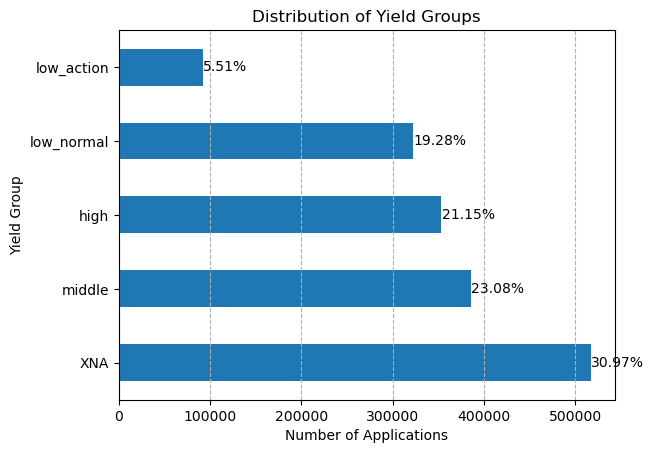

In [17]:
yield_group_distribution = previous_application_data['NAME_YIELD_GROUP'].value_counts()
yield_group_percentage = (yield_group_distribution / yield_group_distribution.sum()) * 100

print(yield_group_distribution)
print(yield_group_percentage)


yield_group_distribution.plot(kind='barh')
plt.title('Distribution of Yield Groups')
plt.xlabel('Number of Applications')
plt.ylabel('Yield Group')
plt.grid(axis='x', linestyle='--')

# Adding percentage labels to the right of the bars using iloc
for i, value in enumerate(yield_group_distribution):
    plt.text(value + 50, i, f'{yield_group_percentage.iloc[i]:.2f}%', va='center')

plt.show()


NAME_CONTRACT_STATUS   Approved   Canceled    Refused  Unused offer
NAME_YIELD_GROUP                                                   
XNA                   18.904131  59.216767  16.943824      4.935278
high                  84.628295   0.282455  15.068873      0.020377
low_action            77.004813   1.044100  21.951087           NaN
low_normal            76.398578   1.498937  21.899750      0.202735
middle                83.789672   0.844029  15.318313      0.047986


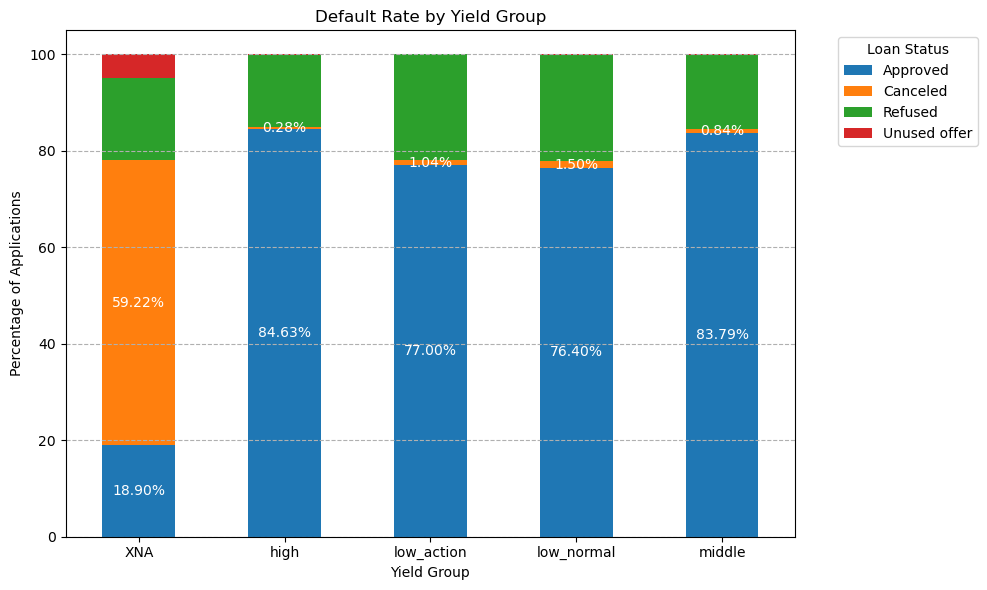

In [18]:
yield_target_distribution = previous_application_data.groupby('NAME_YIELD_GROUP')['NAME_CONTRACT_STATUS'].value_counts(normalize=True).unstack() * 100

print(yield_target_distribution)

yield_target_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Default Rate by Yield Group')
plt.xlabel('Yield Group')
plt.ylabel('Percentage of Applications')
plt.grid(axis='y', linestyle='--')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

for i in range(len(yield_target_distribution)):
    non_default = yield_target_distribution.iloc[i, 0]
    default = yield_target_distribution.iloc[i, 1]
    plt.text(i, non_default / 2, f'{non_default:.2f}%', ha='center', va='center', color='white')
    plt.text(i, non_default + (default / 2), f'{default:.2f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()



### Insights:
- **XNA Group**:
  - Has the highest percentage of canceled contracts (59.22%).
  - Only 18.90% of applications were approved, which is significantly lower than other yield groups.
  - This group might represent a special category, possibly indicating unknown or unclassified yield gr category.

- **Low Action Yield Group**:
  - Has a fairly high approval rate (77.00%) but also a notable refusal rate (21.95%).
  - Canceled contracts are miery few unused offers.

### Potential Reasoning:
- **XNA**: This group likely represents unclassified or unspecified yield types, which could explain the high cancellation rates and low approval rates.
- **High and Middle Yield Groups**: These have strong approval rates, indicating these yield groups are perceived as less risky.
- **Low Action and Low Normal**: These categories still have good approval rates but exhibit higher refusal rates, suggesthe yield group classification.

# Goods category

NAME_GOODS_CATEGORY
XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\2555568141.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value + 50, i, f'{goods_category_percentage[i]:.2f}%', va='center')


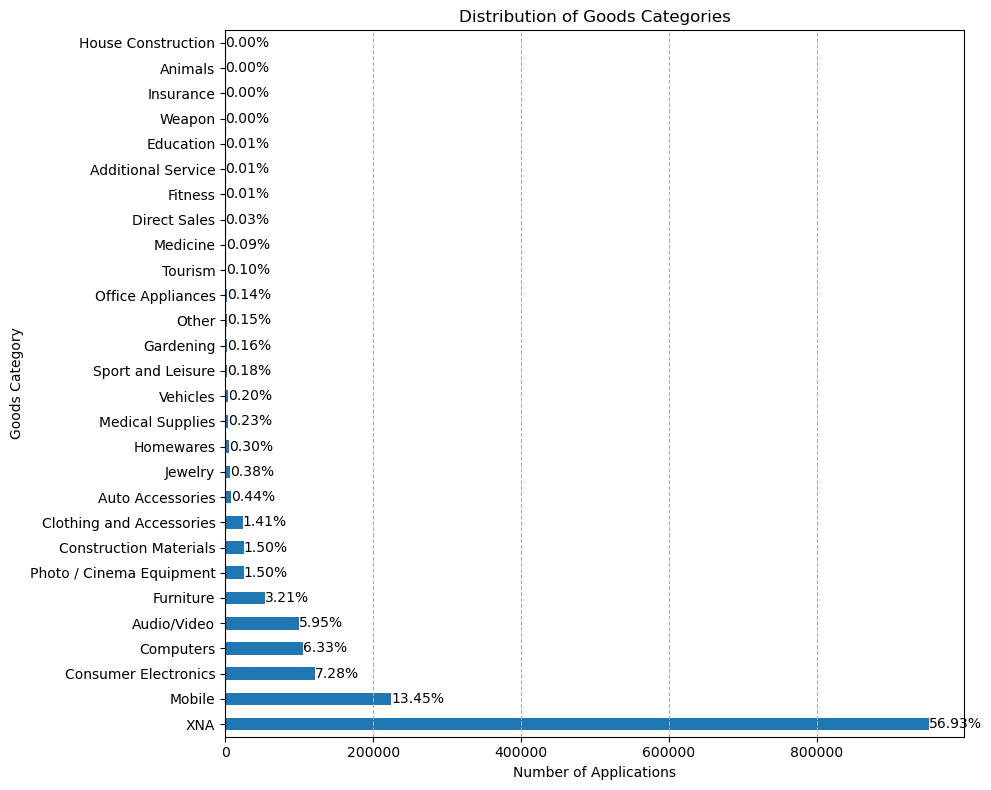

In [19]:
# Univariate analysis for NAME_GOODS_CATEGORY
goods_category_distribution = previous_application_data['NAME_GOODS_CATEGORY'].value_counts()
goods_category_percentage = (goods_category_distribution / goods_category_distribution.sum()) * 100

# Display the results
print(goods_category_distribution)
print(goods_category_percentage)

# Plot the distribution of goods categories
goods_category_distribution.plot(kind='barh', figsize=(10, 8))
plt.title('Distribution of Goods Categories')
plt.xlabel('Number of Applications')
plt.ylabel('Goods Category')
plt.grid(axis='x', linestyle='--')

# Add percentage labels to the bars
for i, value in enumerate(goods_category_distribution):
    plt.text(value + 50, i, f'{goods_category_percentage[i]:.2f}%', va='center')

plt.tight_layout()
plt.show()


Here it can be seen that the **XNA** hold more then half of the volume, the interpertation is that most of the people do not specify the place where they are spending the cash, and due to spending at multiple places it can't be specified for multiple goods


NAME_CONTRACT_STATUS        Approved   Canceled     Refused  Unused offer
NAME_GOODS_CATEGORY                                                      
Additional Service         90.625000        NaN    9.375000           NaN
Animals                   100.000000        NaN         NaN           NaN
Audio/Video                89.896522   0.032180    9.131043      0.940256
Auto Accessories           88.876846   0.027097    9.199295      1.896762
Clothing and Accessories   91.109790        NaN    8.533582      0.356627
Computers                  83.247454   0.033091   12.795810      3.923645
Construction Materials     89.901980   0.028006    9.817964      0.252050
Consumer Electronics       91.732743   0.021386    7.485030      0.760841
Direct Sales               83.408072        NaN   16.367713      0.224215
Education                  85.046729        NaN   14.953271           NaN
Fitness                    99.043062        NaN    0.956938           NaN
Furniture                  91.490234  

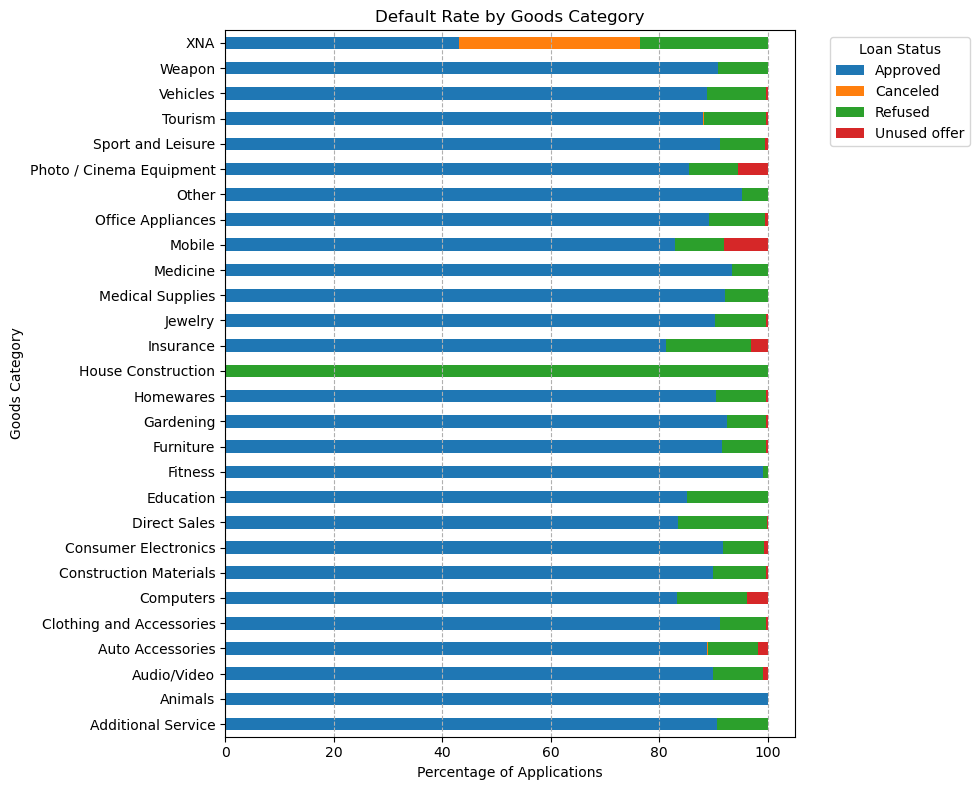

In [20]:
# Bivariate analysis of NAME_GOODS_CATEGORY with TARGET
goods_category_default_rate = previous_application_data.groupby('NAME_GOODS_CATEGORY')['NAME_CONTRACT_STATUS'].value_counts(normalize=True).unstack() * 100

# Display the bivariate analysis result
print(goods_category_default_rate)

# Plotting the default rates for each goods category
goods_category_default_rate.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title('Default Rate by Goods Category')
plt.xlabel('Percentage of Applications')
plt.ylabel('Goods Category')
plt.grid(axis='x', linestyle='--')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**High Approval Rates**:
Most categories, such as Animals, Fitness, Medicine, and Other, have very high approval rates (above 90%), indicating that loans for these items are generally low-risk or have a higher chance of being approved.

**Higher Refusal Rates**:
Categories like Direct Sales, House Construction, Insurance, and Education show higher refusal rates compared to others, suggesting that loans for these goods might be considered riskier by lenders.

**Unused Offers**:
Categories like Mobile and Photo / Cinema Equipment have a notable percentage of unused offers, which could imply that applicants either reconsidered their loan needs or found alternative solutions after applying.

# extra analysis questions that was decided in the meeting

# Family Status

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64
NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: count, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\206397194.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value + 200, index, f'{family_status_percentage[index]:.2f}%', va='center')


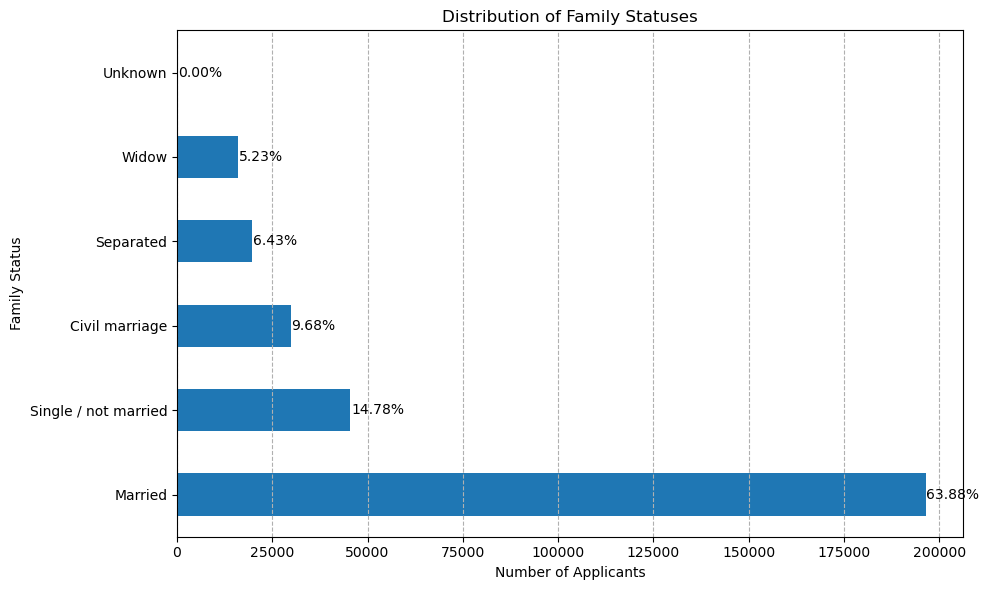

In [21]:
# Calculate the distribution of family statuses
family_status_distribution = application_data['NAME_FAMILY_STATUS'].value_counts()
family_status_percentage = (family_status_distribution / family_status_distribution.sum()) * 100

# Display the distribution and percentage of each family status
print(family_status_distribution)
print(family_status_percentage)

# Plotting the distribution as a horizontal bar chart
family_status_distribution.plot(kind='barh', figsize=(10, 6))
plt.title('Distribution of Family Statuses')
plt.xlabel('Number of Applicants')
plt.ylabel('Family Status')
plt.grid(axis='x', linestyle='--')

# Adding percentage labels next to each bar for clarity
for index, value in enumerate(family_status_distribution):
    plt.text(value + 200, index, f'{family_status_percentage[index]:.2f}%', va='center')

plt.tight_layout()
plt.show()


posx and posy should be finite values


TARGET                         0         1
NAME_FAMILY_STATUS                        
Civil marriage         90.055416  9.944584
Married                92.440132  7.559868
Separated              91.805766  8.194234
Single / not married   90.192325  9.807675
Unknown               100.000000       NaN
Widow                  94.175783  5.824217


posx and posy should be finite values


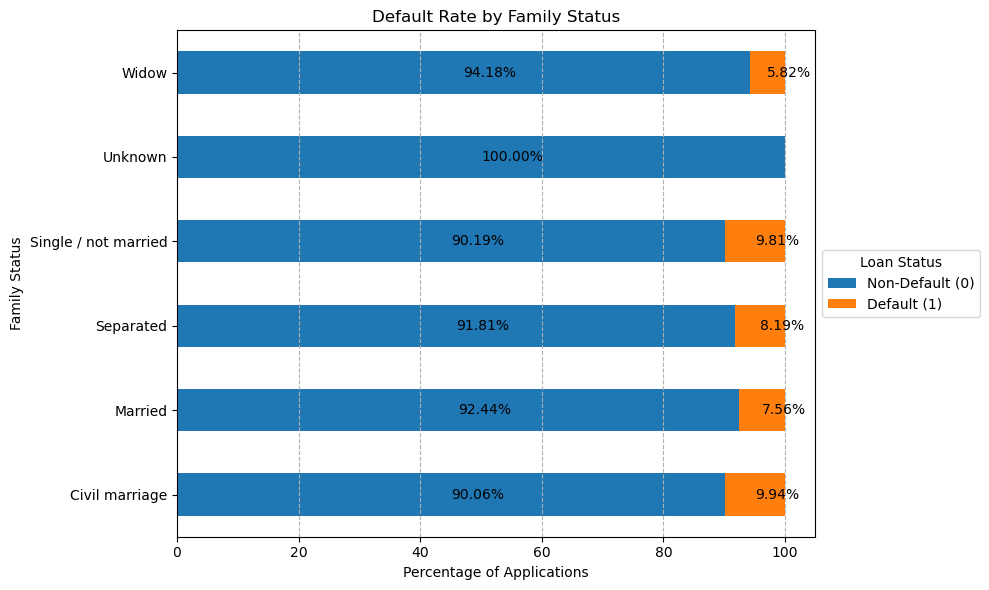

In [22]:
# Group by NAME_FAMILY_STATUS and calculate the percentage of defaults (TARGET = 1)
family_status_default_rate = application_data.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts(normalize=True).unstack() * 100

# Display the calculated default rates for each family status
print(family_status_default_rate)

# Plotting the data to visualize the default rates for different family statuses
family_status_default_rate.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Default Rate by Family Status')
plt.xlabel('Percentage of Applications')
plt.ylabel('Family Status')
plt.grid(True, axis='x', linestyle='--')
plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'], loc='center left', bbox_to_anchor=(1, 0.5))

# Add percentage labels to the bars for a better visual understanding
for index, (non_default, default) in enumerate(zip(family_status_default_rate[0], family_status_default_rate[1])):
    plt.text(non_default / 2, index, f'{non_default:.2f}%', va='center', color='black')
    plt.text(non_default + (default / 2), index, f'{default:.2f}%', va='center', color='black')

plt.tight_layout()
plt.show()


## car ownership


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13940\1913168115.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index, value + 2000, f'{car_ownership_percentage[index]:.2f}%', ha='center')


Car Ownership Distribution:
 FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Car Ownership Percentage:
 FLAG_OWN_CAR
N    65.989184
Y    34.010816
Name: count, dtype: float64


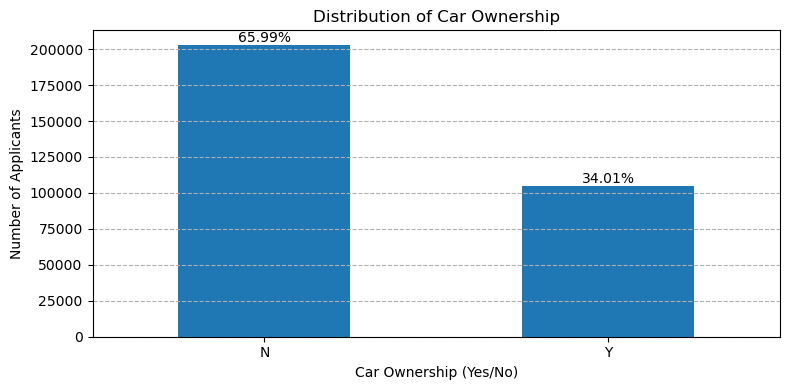

In [23]:
# Univariate Analysis: Distribution of Car Ownership
# Calculate the distribution of car ownership
car_ownership_distribution = application_data['FLAG_OWN_CAR'].value_counts()
car_ownership_percentage = (car_ownership_distribution / car_ownership_distribution.sum()) * 100

# Display the distribution and percentage of car ownership
print("Car Ownership Distribution:\n", car_ownership_distribution)
print("\nCar Ownership Percentage:\n", car_ownership_percentage)

# Plotting the distribution of car ownership as a bar chart
plt.figure(figsize=(8, 4))
car_ownership_distribution.plot(kind='bar')
plt.title('Distribution of Car Ownership')
plt.xlabel('Car Ownership (Yes/No)')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Adding percentage labels on top of the bars
for index, value in enumerate(car_ownership_distribution):
    plt.text(index, value + 2000, f'{car_ownership_percentage[index]:.2f}%', ha='center')

plt.tight_layout()
plt.show()



Default Rate by Car Ownership:
 TARGET                0         1
FLAG_OWN_CAR                     
N             91.499773  8.500227
Y             92.756270  7.243730


<Figure size 800x400 with 0 Axes>

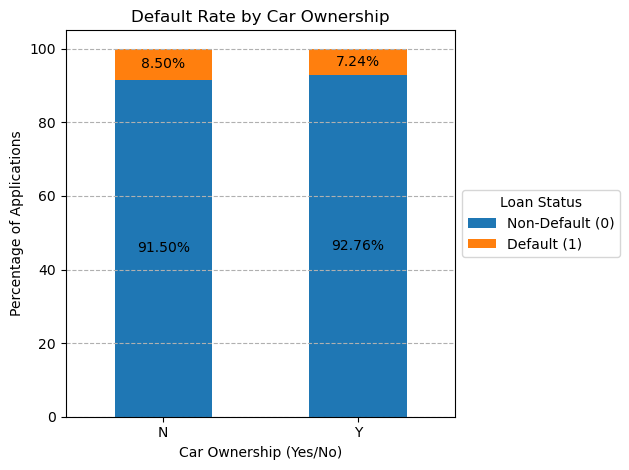

In [24]:

# Bivariate Analysis: Relationship Between Car Ownership and Default Status
# Group by car ownership and calculate the percentage of defaults (TARGET = 1)
car_ownership_default_rate = application_data.groupby('FLAG_OWN_CAR')['TARGET'].value_counts(normalize=True).unstack() * 100

# Display the calculated default rates for each car ownership status
print("\nDefault Rate by Car Ownership:\n", car_ownership_default_rate)

# Plotting the default rates for car ownership as a stacked bar chart
plt.figure(figsize=(8, 4))
car_ownership_default_rate.plot(kind='bar', stacked=True)
plt.title('Default Rate by Car Ownership')
plt.xlabel('Car Ownership (Yes/No)')
plt.ylabel('Percentage of Applications')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'], loc='center left', bbox_to_anchor=(1, 0.5))

# Adding percentage labels to the bars for better visual understanding
for index, (non_default, default) in enumerate(zip(car_ownership_default_rate[0], car_ownership_default_rate[1])):
    plt.text(index, non_default / 2, f'{non_default:.2f}%', ha='center', va='center', color='black')
    plt.text(index, non_default + (default / 2), f'{default:.2f}%', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


Hourly Application Distribution:
 HOUR_APPR_PROCESS_START
0        40
1        86
2       305
3      1230
4      2090
5      3638
6      5842
7      9131
8     15127
9     27384
10    37722
11    37229
12    34233
13    30959
14    27682
15    24839
16    20385
17    14900
18     9049
19     3848
20     1196
21      405
22      150
23       41
Name: count, dtype: int64

Hourly Application Percentage:
 HOUR_APPR_PROCESS_START
0      0.013008
1      0.027966
2      0.099183
3      0.399986
4      0.679650
5      1.183047
6      1.899769
7      2.969325
8      4.919174
9      8.905047
10    12.266878
11    12.106559
12    11.132285
13    10.067607
14     9.001954
15     8.077435
16     6.629031
17     4.845355
18     2.942659
19     1.251337
20     0.388929
21     0.131703
22     0.048779
23     0.013333
Name: count, dtype: float64


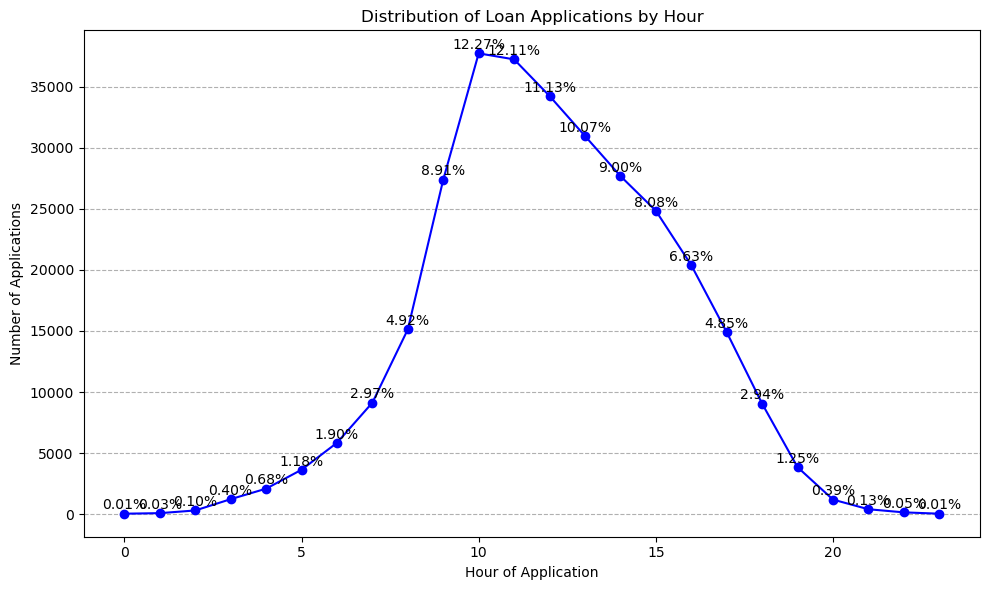

In [25]:
# Univariate Analysis: Distribution of Applications by Hour
# Calculate the distribution of applications across hours
hourly_distribution = application_data['HOUR_APPR_PROCESS_START'].value_counts().sort_index()
hourly_percentage = (hourly_distribution / hourly_distribution.sum()) * 100

# Display the distribution and percentage of applications by hour
print("Hourly Application Distribution:\n", hourly_distribution)
print("\nHourly Application Percentage:\n", hourly_percentage)

# Plotting the hourly distribution as a line chart
plt.figure(figsize=(10, 6))
hourly_distribution.plot(kind='line', marker='o', color='blue')
plt.title('Distribution of Loan Applications by Hour')
plt.xlabel('Hour of Application')
plt.ylabel('Number of Applications')
plt.grid(axis='y', linestyle='--')

# Adding percentage labels on the chart
for index, value in enumerate(hourly_distribution):
    plt.text(index, value + 100, f'{hourly_percentage[index]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



Default Rate by Hour of Application:
 TARGET                           0          1
HOUR_APPR_PROCESS_START                      
0                        85.000000  15.000000
1                        91.860465   8.139535
2                        90.163934   9.836066
3                        91.300813   8.699187
4                        91.722488   8.277512
5                        89.417262  10.582738
6                        88.959261  11.040739
7                        89.957288  10.042712
8                        90.923514   9.076486
9                        91.794479   8.205521
10                       91.978156   8.021844
11                       91.925649   8.074351
12                       91.741886   8.258114
13                       91.973255   8.026745
14                       92.092334   7.907666
15                       92.407102   7.592898
16                       92.538631   7.461369
17                       93.510067   6.489933
18                       92.982650   7.01

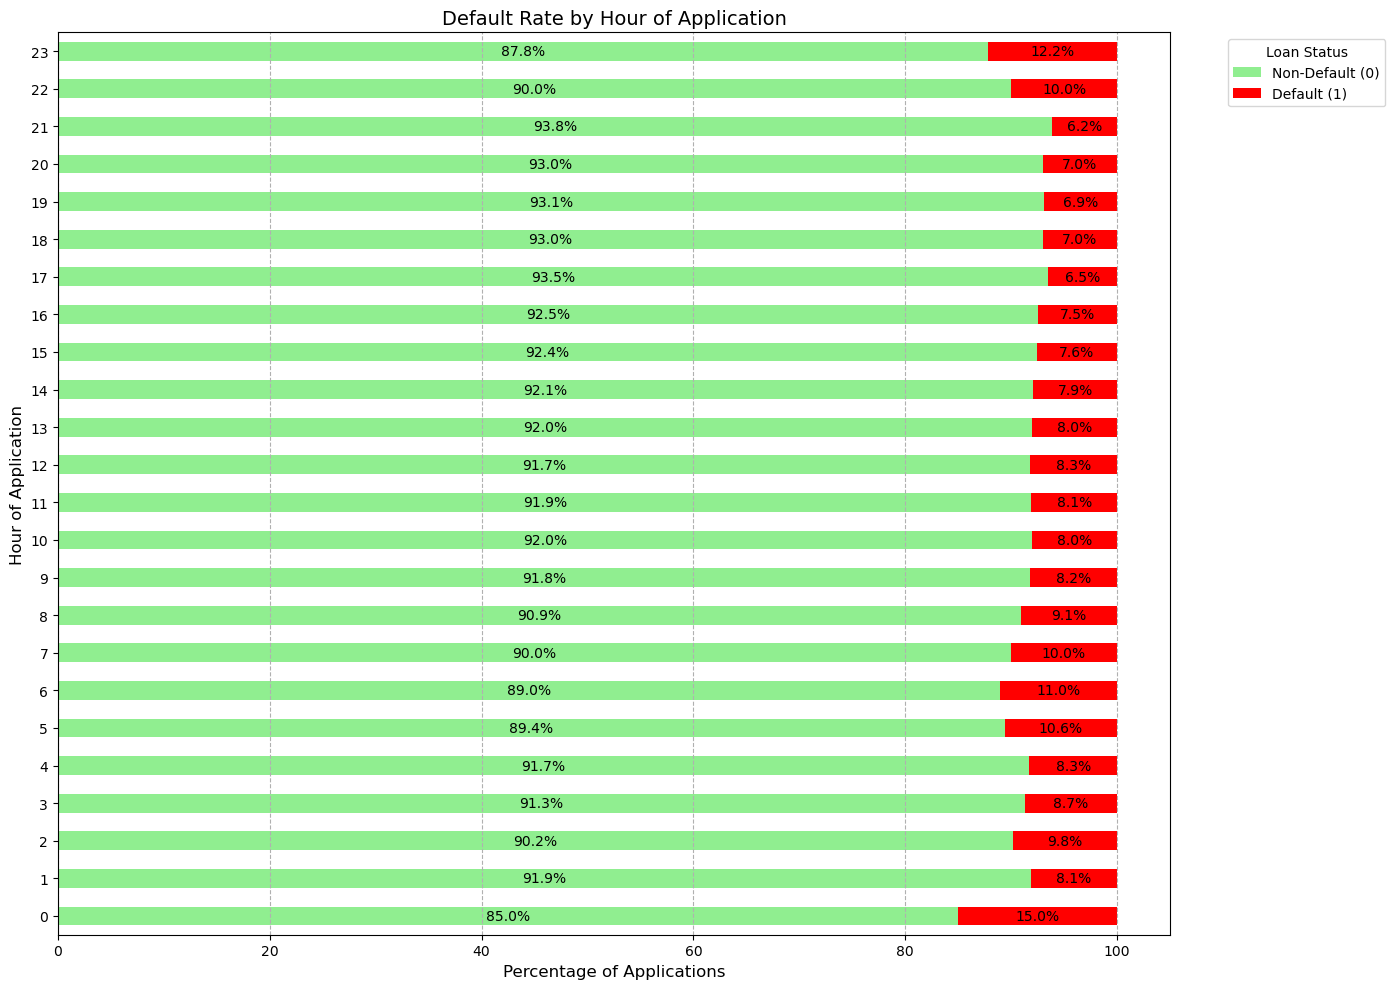

In [26]:
# Bivariate Analysis: Relationship Between Hour of Application and Default Status
hourly_default_rate = application_data.groupby('HOUR_APPR_PROCESS_START')['TARGET'].value_counts(normalize=True).unstack() * 100

# Display the calculated default rates for each hour of application
print("\nDefault Rate by Hour of Application:\n", hourly_default_rate)

# Plotting the default rates for each hour as a horizontal stacked bar chart
plt.figure(figsize=(14, 10))
hourly_default_rate.plot(kind='barh', stacked=True, color=['lightgreen','red'], ax=plt.gca())
plt.title('Default Rate by Hour of Application', fontsize=14)
plt.xlabel('Percentage of Applications', fontsize=12)
plt.ylabel('Hour of Application', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.legend(title='Loan Status',bbox_to_anchor=(0.7, 0.5, 0.5, 0.5),labels=['Non-Default (0)', 'Default (1)'], loc='upper right')

# Adding percentage labels to the bars for better visual understanding
for index, (non_default, default) in enumerate(zip(hourly_default_rate[0], hourly_default_rate[1])):
    plt.text(non_default / 2, index, f'{non_default:.1f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(non_default + (default / 2), index, f'{default:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()


## Relationship between gender and income type as per target


Default Rate by Gender and Income Type:
 TARGET                                     0          1
CODE_GENDER NAME_INCOME_TYPE                           
F           Businessman           100.000000        NaN
            Commercial associate   93.333333   6.666667
            Maternity leave        50.000000  50.000000
            Pensioner              95.044299   4.955701
            State servant          94.658174   5.341826
            Student               100.000000        NaN
            Unemployed             64.705882  35.294118
            Working                91.626715   8.373285
M           Businessman           100.000000        NaN
            Commercial associate   91.172455   8.827545
            Maternity leave       100.000000        NaN
            Pensioner              92.683893   7.316107
            State servant          93.124679   6.875321
            Student               100.000000        NaN
            Unemployed             60.000000  40.000000
      

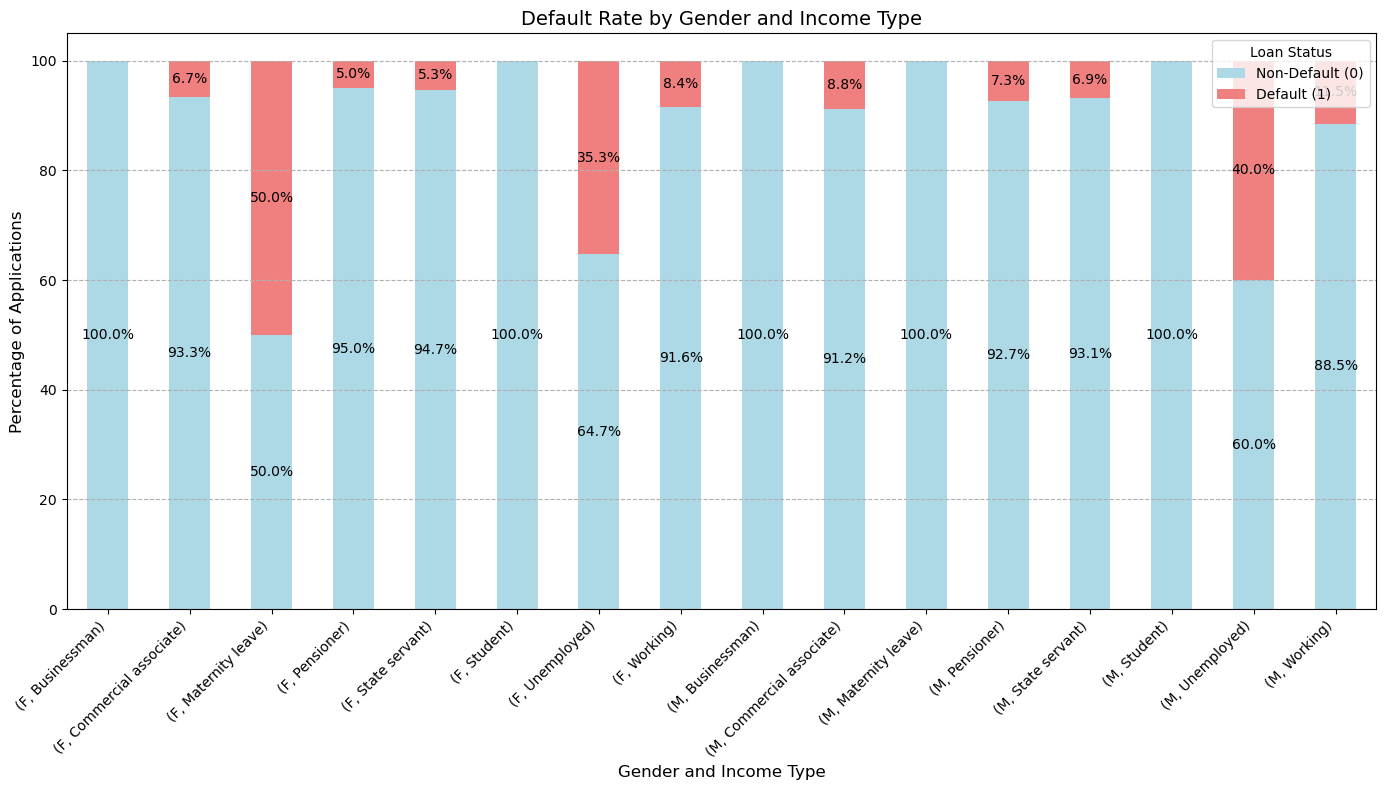

In [27]:
# Group the data by gender, income type, and target, then calculate percentages
gender_income_default_rate = application_data.groupby(['CODE_GENDER', 'NAME_INCOME_TYPE'])['TARGET'].value_counts(normalize=True).unstack() * 100

# Display the calculated default rates
print("\nDefault Rate by Gender and Income Type:\n", gender_income_default_rate)

# Plotting the data to visualize the relationship between gender, income type, and default status
plt.figure(figsize=(14, 8))
ax = gender_income_default_rate.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())
plt.title('Default Rate by Gender and Income Type', fontsize=14)
plt.xlabel('Gender and Income Type', fontsize=12)
plt.ylabel('Percentage of Applications', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'], loc='upper right')

# Adding percentage labels to each bar section for clarity
for i, (index, row) in enumerate(gender_income_default_rate.iterrows()):
    non_default = row[0] if not pd.isna(row[0]) else 0  # Check for NaN
    default = row[1] if not pd.isna(row[1]) else 0      # Check for NaN
    if non_default > 0:
        plt.text(i, non_default / 2, f'{non_default:.1f}%', ha='center', va='center', color='black', fontsize=10)
    if default > 0:
        plt.text(i, non_default + (default / 2), f'{default:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Correlation of columns for target and external sources—heatmap

                TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
TARGET        1.000000     -0.155317     -0.160472     -0.178919
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000


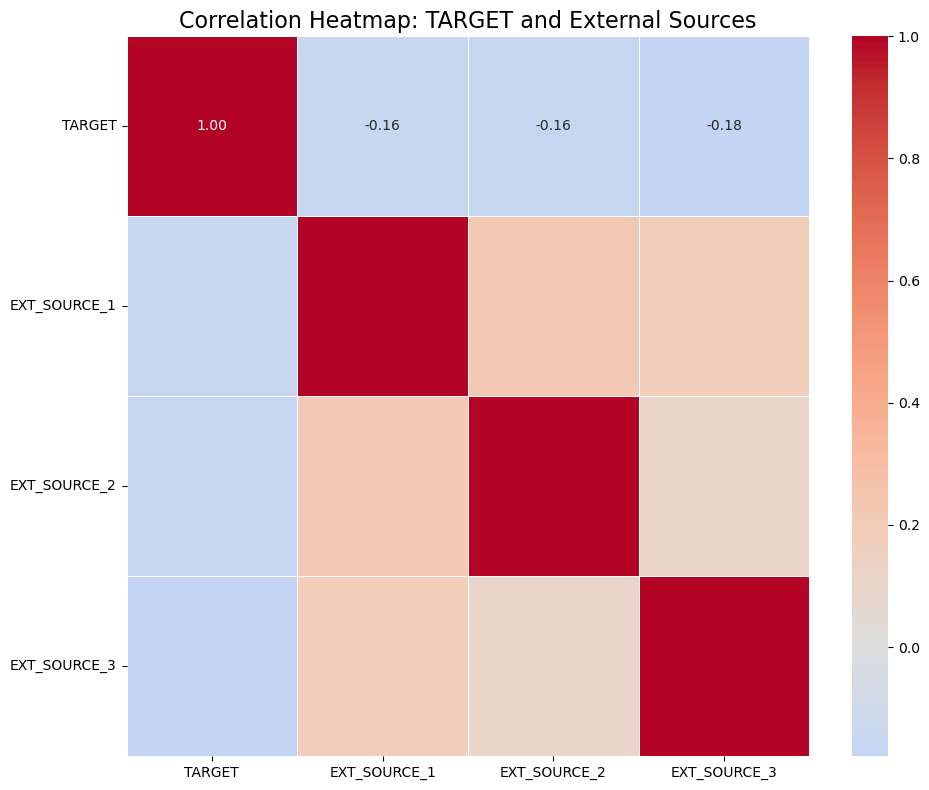

In [28]:
columns_of_interest = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
correlation_matrix = application_data[columns_of_interest].corr()

print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',center=0,linewidths=0.5,linecolor='white')
plt.title('Correlation Heatmap: TARGET and External Sources', fontsize=16)
plt.xticks(rotation=0, ha='center') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Influence of Previous Application Status on Current Application Status

SK_ID_CURR
100002    1
100003    3
100004    1
100006    9
100007    6
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: count, Length: 307511, dtype: int64


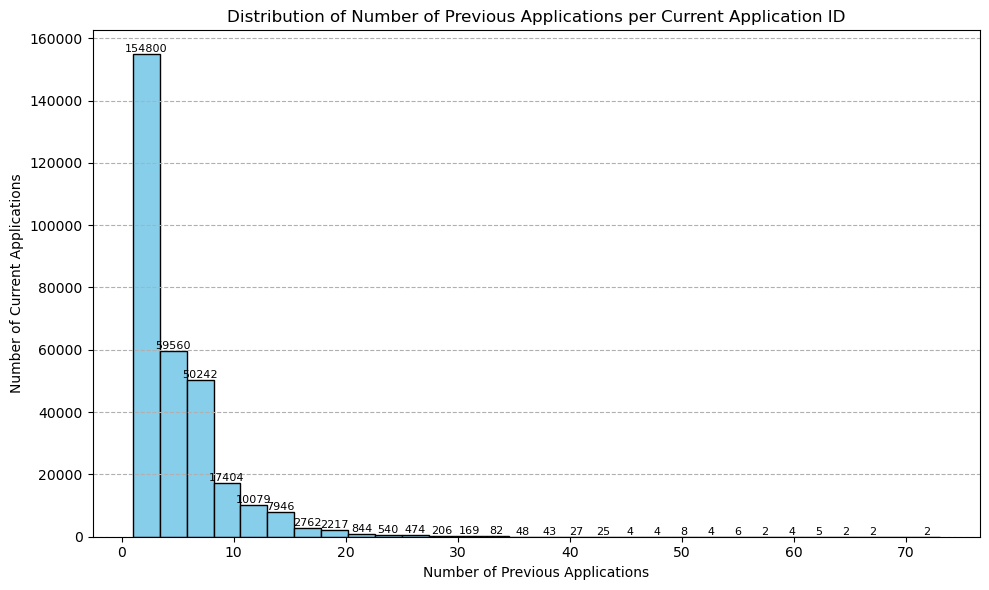

TARGET                     0      1
NAME_CONTRACT_STATUS               
Approved              818856  67243
Canceled              235641  23800
Refused               215952  29438
Unused offer           20892   1879


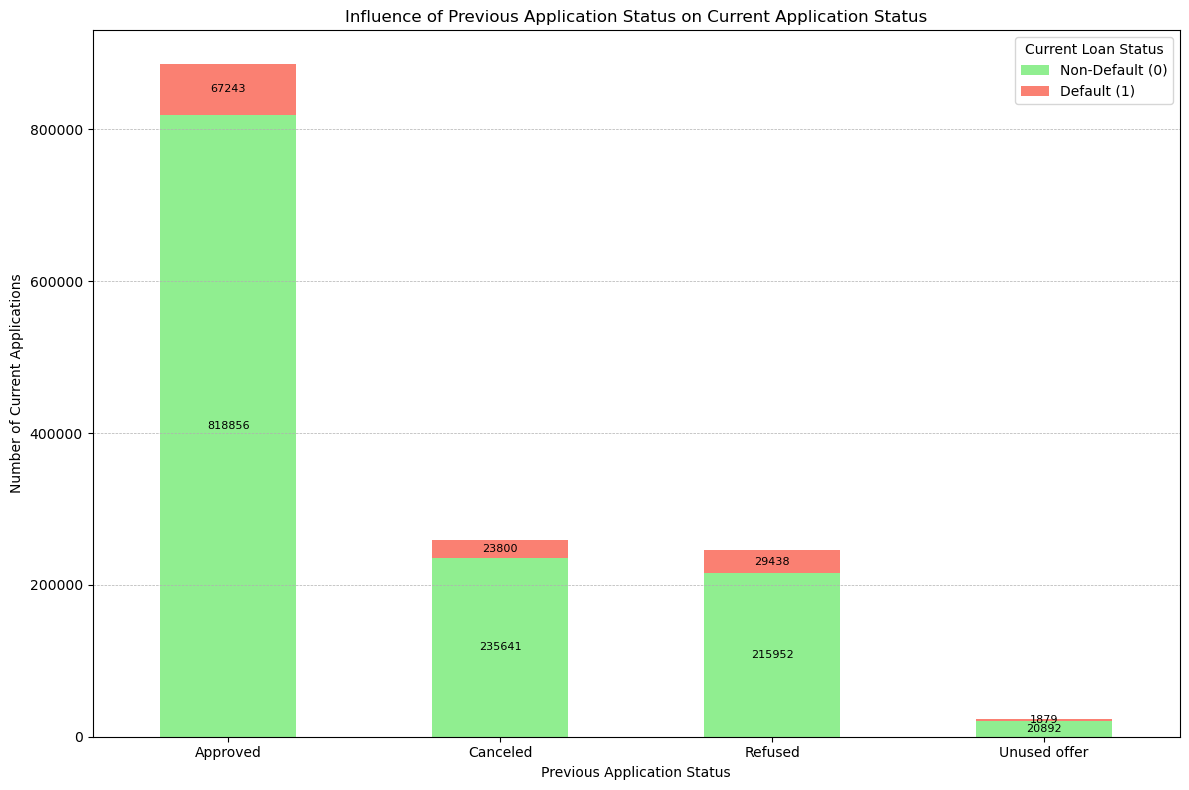

In [29]:
# Merging current and previous application datasets using SK_ID_CURR
merged_data = pd.merge(application_data, previous_application_data, on='SK_ID_CURR', how='left', suffixes=('_curr', '_prev'))

# Calculating the number of previous applications for each current application ID
previous_app_counts = merged_data['SK_ID_CURR'].value_counts().sort_index()
print(previous_app_counts)

# Plotting the distribution of previous application counts with histogram
plt.figure(figsize=(10, 6))
previous_app_counts.plot(kind='hist', bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Number of Previous Applications per Current Application ID')
plt.xlabel('Number of Previous Applications')
plt.ylabel('Number of Current Applications')
plt.grid(axis='y', linestyle='--')

# Adding value labels on top of the histogram bars
bin_edges = plt.gca().patches
for bin_edge in bin_edges:
    height = bin_edge.get_height()
    if height > 0:
        plt.text(bin_edge.get_x() + bin_edge.get_width() / 2, height, f'{int(height)}', 
                 ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Analyzing the influence of the previous application statuses on the current application status
status_analysis = merged_data.groupby(['NAME_CONTRACT_STATUS', 'TARGET']).size().unstack().fillna(0)
print(status_analysis)

# Plotting a stacked bar chart for previous application statuses by current application status
ax = status_analysis.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightgreen', 'salmon'])
plt.title('Influence of Previous Application Status on Current Application Status')
plt.xlabel('Previous Application Status')
plt.ylabel('Number of Current Applications')
plt.legend(title='Current Loan Status', labels=['Non-Default (0)', 'Default (1)'])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)

# Adding value labels on top of the stacked bars
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


## Contract status by channel

NAME_CONTRACT_STATUS         Approved   Canceled    Refused  Unused offer
CHANNEL_TYPE                                                             
AP+ (Cash loan)             54.747046   6.505276  38.738912      0.008765
Car dealer                  63.274336   9.734513  26.991150           NaN
Channel of corporate sales  43.073171   2.211382  54.715447           NaN
Contact center              35.373157  42.794227  21.832616           NaN
Country-wide                81.422103   0.360226  13.293578      4.924094
Credit and cash offices     40.148451  38.886867  20.896762      0.067920
Regional / Local            88.840668   0.087535  10.436017      0.635781
Stone                       89.179708   0.031591  10.367639      0.421062


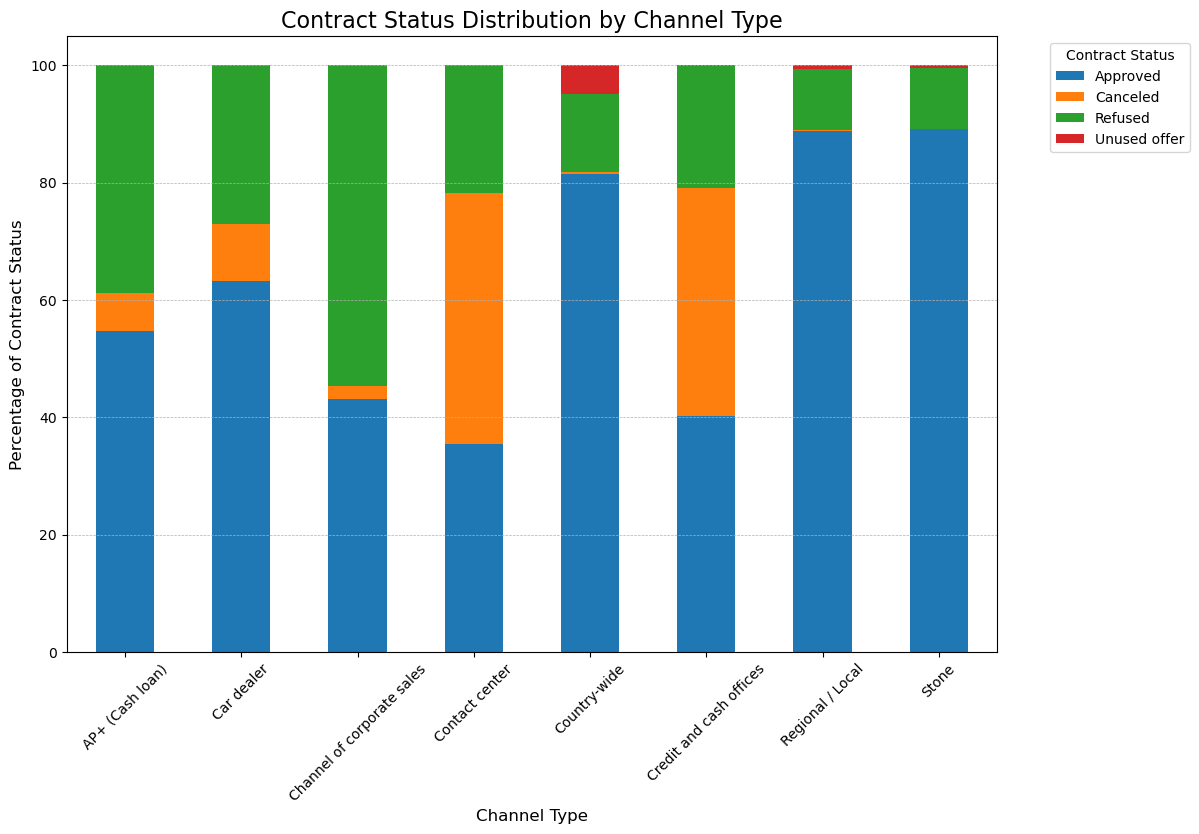

In [30]:
channel_contract_status = previous_application_data.groupby(['CHANNEL_TYPE', 'NAME_CONTRACT_STATUS']).size().unstack()

channel_contract_status_percentage = (channel_contract_status.T / channel_contract_status.sum(axis=1)).T * 100

print(channel_contract_status_percentage)

plt.figure(figsize=(12, 8))
channel_contract_status_percentage.plot(kind='bar', stacked=True,ax=plt.gca())

plt.title('Contract Status Distribution by Channel Type', fontsize=16)
plt.xlabel('Channel Type', fontsize=12)
plt.ylabel('Percentage of Contract Status', fontsize=12)
plt.xticks(rotation=45, ha='center')
plt.legend(title='Contract Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


## Days to decision and number of applications



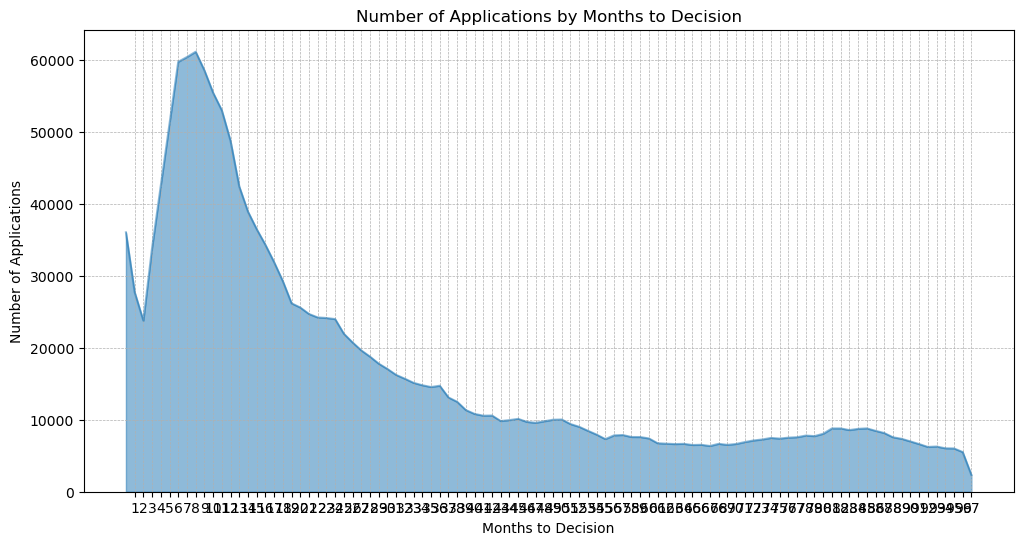

In [31]:
previous_application_data['MONTHS_DECISION'] = (previous_application_data['DAYS_DECISION'] / 30).astype(int).abs()

months_to_decision_counts = previous_application_data['MONTHS_DECISION'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
months_to_decision_counts.plot(kind='area', alpha=0.5)
plt.title('Number of Applications by Months to Decision')
plt.xlabel('Months to Decision')
plt.ylabel('Number of Applications')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(range(1, months_to_decision_counts.index.max() +1))
plt.show()


## average application amount v/s average credited amount 





# warning this might be wrong

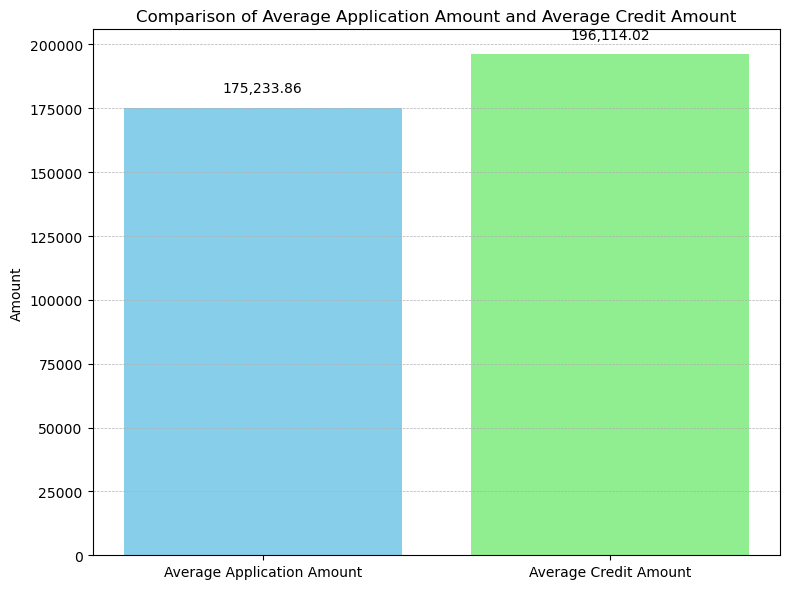

In [32]:
# Calculating the average application amount and credit amount
average_application_amount = previous_application_data['AMT_APPLICATION'].mean()
average_credit_amount = previous_application_data['AMT_CREDIT'].mean()

# Creating a DataFrame for plotting
average_values = pd.DataFrame({
    'Amount Type': ['Average Application Amount', 'Average Credit Amount'],
    'Amount': [average_application_amount, average_credit_amount]
})

# Plotting the bar chart for the average amounts
plt.figure(figsize=(8, 6))
plt.bar(average_values['Amount Type'], average_values['Amount'], color=['skyblue', 'lightgreen'])
plt.title('Comparison of Average Application Amount and Average Credit Amount')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding data labels on top of each bar
for i, value in enumerate(average_values['Amount']):
    plt.text(i, value + 5000, f'{value:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# contract status and goods category to analyze the relationship


NAME_GOODS_CATEGORY   Additional Service  Animals  Audio/Video  \
NAME_CONTRACT_STATUS                                             
Approved                           116.0      1.0      89394.0   
Canceled                             0.0      0.0         32.0   
Refused                             12.0      0.0       9080.0   
Unused offer                         0.0      0.0        935.0   

NAME_GOODS_CATEGORY   Auto Accessories  Clothing and Accessories  Computers  \
NAME_CONTRACT_STATUS                                                          
Approved                        6560.0                   21460.0    88050.0   
Canceled                           2.0                       0.0       35.0   
Refused                          679.0                    2010.0    13534.0   
Unused offer                     140.0                      84.0     4150.0   

NAME_GOODS_CATEGORY   Construction Materials  Consumer Electronics  \
NAME_CONTRACT_STATUS                                      

<Figure size 1400x800 with 0 Axes>

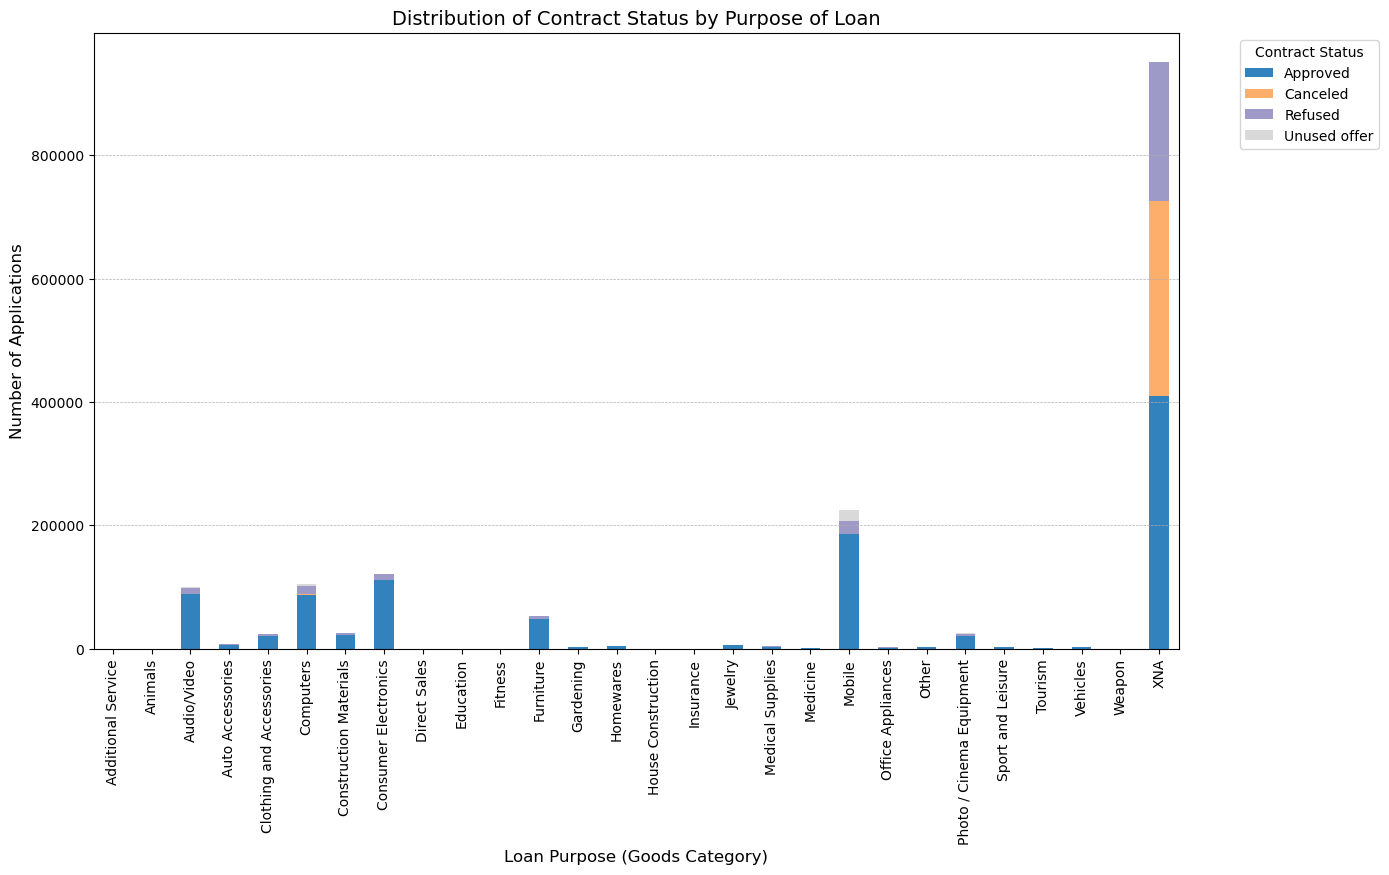

In [33]:
contract_purpose_analysis = previous_application_data.groupby(['NAME_CONTRACT_STATUS', 'NAME_GOODS_CATEGORY']).size().unstack().fillna(0)
print(contract_purpose_analysis)

plt.figure(figsize=(14, 8))
contract_purpose_analysis.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20c')

plt.title('Distribution of Contract Status by Purpose of Loan', fontsize=14)
plt.xlabel('Loan Purpose (Goods Category)', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(title='Contract Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# contract status and contract type


NAME_CONTRACT_STATUS  Approved  Canceled   Refused  Unused offer
NAME_CONTRACT_TYPE                                              
Cash loans            312540.0  268591.0  165928.0         494.0
Consumer loans        626470.0    1559.0   75185.0       25937.0
Revolving loans        97771.0   45854.0   49534.0           5.0
XNA                        0.0     315.0      31.0           0.0


<Figure size 1200x800 with 0 Axes>

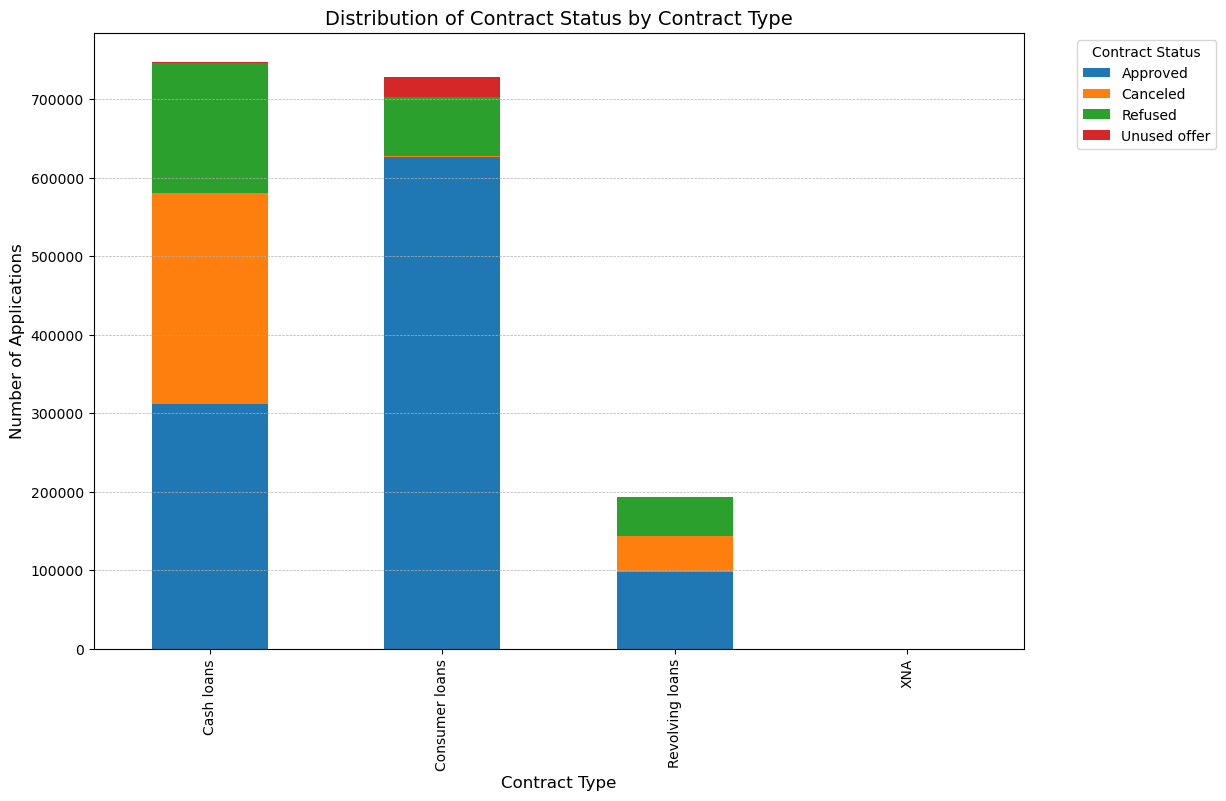

In [34]:
contract_status_type_analysis = previous_application_data.groupby(['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']).size().unstack().fillna(0)
print(contract_status_type_analysis)

plt.figure(figsize=(12, 8))
contract_status_type_analysis.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Distribution of Contract Status by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(title='Contract Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# predictive modeling

In [35]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE            object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT                    float64 
 9    AMT_ANNUITY                   float64 
 10   AMT_GOODS_PRICE               float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH                 

In [36]:
target_distribution=application_data['TARGET'].value_counts()/application_data['TARGET'].count()*100
target_distribution

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

there is an imbalencing in the given data set so what we can do is we can make a balanced dataset for which the balance for 55/45 would be enough 

### lets create two different dataset for both [0/1] target value

In [37]:
non_defaulter=application_data[application_data['TARGET']==0]
defaulter=application_data[application_data['TARGET']==1]


non_defaulter.shape,defaulter.shape

((282686, 123), (24825, 123))

### now just make the new data set with sampled value

In [38]:
from sklearn.utils import resample

down_sampled_non_defaulters = resample(non_defaulter, replace=False, n_samples=25000, random_state=42)
down_sampled_defaulters = resample(defaulter, replace=False, n_samples=24000, random_state=42)


### checking the result

In [39]:
down_sampled_defaulters.shape, down_sampled_non_defaulters.shape

((24000, 123), (25000, 123))

## making a new data set which is balanced 

In [40]:
balanced_application= pd.concat([down_sampled_defaulters,down_sampled_non_defaulters])

### shuffeling the data 

In [41]:
balanced_application = balanced_application.sample(frac=1, random_state=42).reset_index(drop=True) 

In [42]:
balanced_application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bureau_Request_Band
0,196491,0,Cash loans,F,Y,N,1,180000.0,797557.5,26487.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,178011,0,Cash loans,M,Y,Y,1,180000.0,521280.0,28408.5,...,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0,0
2,170702,0,Cash loans,F,N,Y,0,171000.0,312768.0,24691.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,0
3,106289,0,Cash loans,F,N,Y,0,33300.0,359685.0,15237.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,269366,1,Cash loans,M,Y,N,2,135000.0,1442952.0,39811.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48995,430408,1,Cash loans,F,N,Y,0,153000.0,1442952.0,39681.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0
48996,351828,0,Cash loans,F,Y,Y,0,157500.0,1185120.0,36063.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0
48997,212652,0,Cash loans,F,N,N,0,135000.0,540360.0,14382.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
48998,140608,1,Cash loans,M,Y,Y,0,247500.0,640080.0,29970.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0


## since data set is balanced we can now move with the feature selection

### checking for the null values 

In [43]:
balanced_application.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    7484
AMT_REQ_CREDIT_BUREAU_MON     7484
AMT_REQ_CREDIT_BUREAU_QRT     7484
AMT_REQ_CREDIT_BUREAU_YEAR    7484
Bureau_Request_Band           7484
Length: 123, dtype: int64

<Figure size 1600x800 with 0 Axes>

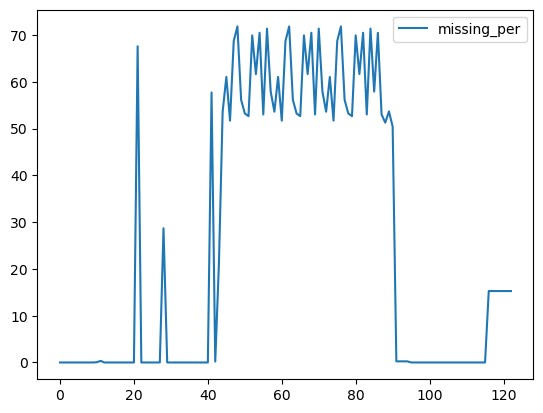

<Figure size 1600x800 with 0 Axes>

In [44]:
missing = pd.DataFrame((balanced_application.isnull().sum())*100/balanced_application.shape[0]).reset_index()
missing['missing_per']=missing[0]
missing.drop(columns=0, inplace=True)
missing.plot(kind='line')
plt.figure(figsize=(16,8))

In [45]:
excess_null_val=list(missing[missing['missing_per']>40].iloc[:,0])

In [46]:
balanced_application.drop(columns=excess_null_val,inplace=True)

In [47]:
balanced_application.shape

(49000, 74)

now that values for which columns have more then 40% is removed we can treat the null values

## null value treatment

In [48]:
num_col= balanced_application.select_dtypes(include=['float64','int64'])
cat_col= balanced_application.select_dtypes(include=['object'])

In [49]:
# Function to fill missing values
def fill_missing_values(df):
    for column in df.columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)   # filling null value in numerical column with mean value
    return df

# Function to treat outliers using IQR method
def treat_outliers(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_limit = Q3 + 1.5 * IQR
            df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)
    return df


### finding outliers 

In [50]:
# Function to find outliers
def find_outliers(df):
    outliers_list = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
            outliers_list.append(outliers)
    return pd.concat(outliers_list)

# Find outliers
outliers = find_outliers(balanced_application)
print("Outliers:\n", outliers)


Outliers:
        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
98         347724       1         Cash loans           F            Y   
141        194313       0    Revolving loans           F            Y   
158        305246       0         Cash loans           M            N   
194        421971       1         Cash loans           M            N   
279        198338       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
48584      323301       1         Cash loans           M            Y   
48623      400553       1         Cash loans           F            N   
48633      438374       0         Cash loans           F            N   
48880      401749       1         Cash loans           M            N   
48982      142775       0         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
98                  Y             3        

## filling the missing values

In [51]:
num_col=fill_missing_values(num_col)

In [52]:
cleaned_data=pd.concat([num_col,cat_col],axis=1)

### droping the values where the cat value is null because the null categorical value is way high and even after removing the null value we'll have enough values

In [53]:
cleaned_data.dropna(inplace=True)

In [54]:
cleaned_data['TARGET'].value_counts()

TARGET
1    17870
0    16954
Name: count, dtype: int64

### removing the outliers

In [55]:
cleaned_data=treat_outliers(cleaned_data)

##  encoding to make categorical into numerical values


In [56]:
category_mapping = {}

for col in cat_col.columns:
    cat = pd.Categorical(cleaned_data[col])
    cleaned_data[col] = cat.codes
    category_mapping[col] = dict(enumerate(cat.categories))

# Display the mapping of codes to categories
print(category_mapping)


{'NAME_CONTRACT_TYPE': {0: 'Cash loans', 1: 'Revolving loans'}, 'CODE_GENDER': {0: 'F', 1: 'M'}, 'FLAG_OWN_CAR': {0: 'N', 1: 'Y'}, 'FLAG_OWN_REALTY': {0: 'N', 1: 'Y'}, 'NAME_TYPE_SUITE': {0: 'Children', 1: 'Family', 2: 'Group of people', 3: 'Other_A', 4: 'Other_B', 5: 'Spouse, partner', 6: 'Unaccompanied'}, 'NAME_INCOME_TYPE': {0: 'Businessman', 1: 'Commercial associate', 2: 'Maternity leave', 3: 'State servant', 4: 'Student', 5: 'Working'}, 'NAME_EDUCATION_TYPE': {0: 'Academic degree', 1: 'Higher education', 2: 'Incomplete higher', 3: 'Lower secondary', 4: 'Secondary / secondary special'}, 'NAME_FAMILY_STATUS': {0: 'Civil marriage', 1: 'Married', 2: 'Separated', 3: 'Single / not married', 4: 'Widow'}, 'NAME_HOUSING_TYPE': {0: 'Co-op apartment', 1: 'House / apartment', 2: 'Municipal apartment', 3: 'Office apartment', 4: 'Rented apartment', 5: 'With parents'}, 'OCCUPATION_TYPE': {0: 'Accountants', 1: 'Cleaning staff', 2: 'Cooking staff', 3: 'Core staff', 4: 'Drivers', 5: 'HR staff', 6: 

## lets standardize thte data set

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [58]:
cleaned_data_ss= ss.fit_transform(cleaned_data)

In [59]:
cleaned_data_ss=pd.DataFrame(cleaned_data_ss)
cleaned_data_ss.columns=cleaned_data.columns
cleaned_data_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34824 entries, 0 to 34823
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   34824 non-null  float64
 1   TARGET                       34824 non-null  float64
 2   CNT_CHILDREN                 34824 non-null  float64
 3   AMT_INCOME_TOTAL             34824 non-null  float64
 4   AMT_CREDIT                   34824 non-null  float64
 5   AMT_ANNUITY                  34824 non-null  float64
 6   AMT_GOODS_PRICE              34824 non-null  float64
 7   REGION_POPULATION_RELATIVE   34824 non-null  float64
 8   DAYS_BIRTH                   34824 non-null  float64
 9   DAYS_EMPLOYED                34824 non-null  float64
 10  DAYS_REGISTRATION            34824 non-null  float64
 11  DAYS_ID_PUBLISH              34824 non-null  float64
 12  FLAG_MOBIL                   34824 non-null  float64
 13  FLAG_EMP_PHONE  

## now that the dataset is cleaned , treated with outliers and balanced and encoded and standatdised we need to select features for the modeling

In [60]:
# Calculate the correlation matrix for the cleaned dataset
correlation_matrix = cleaned_data_ss.corr()

# Get the correlation of each feature with the target variable
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=False)

# Display the top 20 most correlated features with the target variable
print("Top 20 Features Correlated with the Target Variable:\n", target_correlation.head(20))




Top 20 Features Correlated with the Target Variable:
 TARGET                         1.000000
DAYS_EMPLOYED                  0.149020
NAME_EDUCATION_TYPE            0.128297
DAYS_BIRTH                     0.114407
DAYS_LAST_PHONE_CHANGE         0.111473
REGION_RATING_CLIENT_W_CITY    0.089177
REGION_RATING_CLIENT           0.085662
CODE_GENDER                    0.085449
FLAG_DOCUMENT_3                0.080733
DAYS_ID_PUBLISH                0.072704
REG_CITY_NOT_WORK_CITY         0.072297
NAME_INCOME_TYPE               0.070927
DAYS_REGISTRATION              0.065215
NAME_HOUSING_TYPE              0.049060
OCCUPATION_TYPE                0.040917
FLAG_WORK_PHONE                0.036897
AMT_REQ_CREDIT_BUREAU_YEAR     0.036303
OBS_60_CNT_SOCIAL_CIRCLE       0.017700
OBS_30_CNT_SOCIAL_CIRCLE       0.017525
NAME_TYPE_SUITE                0.013057
Name: TARGET, dtype: float64


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target (y)
X = cleaned_data_ss.drop(columns=['TARGET'])# Convert the target variable to integer type to ensure it is treated as a classification problem
y = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model using all features
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.6618808327351041

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      3399
           1       0.67      0.66      0.67      3566

    accuracy                           0.66      6965
   macro avg       0.66      0.66      0.66      6965
weighted avg       0.66      0.66      0.66      6965



## let's do it with limited set of features

In [62]:
cleaned_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [63]:
data_2_cleaned= cleaned_data[['TARGET', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                                'DAYS_REGISTRATION', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','NAME_CONTRACT_TYPE', 'CODE_GENDER', 
                                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']]

In [64]:
data_2_cleaned_ss= ss.fit_transform(data_2_cleaned)
data_2_cleaned_ss=pd.DataFrame(data_2_cleaned_ss)

In [65]:
data_2_cleaned_ss.columns=data_2_cleaned.columns
data_2_cleaned_ss.drop(columns='TARGET',inplace=True)

In [66]:
data_2_cleaned_ss.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,NAME_CONTRACT_TYPE,...,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.212408,0.620182,-0.052093,0.564108,-0.804648,0.685509,0.460497,0.307144,0.318868,-0.308374,...,1.352715,-1.453773,0.417697,-1.589739,-1.016971,-0.365729,-0.352725,0.005654,0.421485,-1.070656
1,0.086183,-0.747735,-0.193411,-0.761623,0.772403,0.891713,1.003478,0.307144,0.318868,-0.308374,...,-0.739254,0.687865,0.417697,-1.589739,-1.818070,1.711777,-0.352725,-0.453865,-0.976754,-0.004090
2,-0.418715,2.441275,0.996639,2.374515,0.376550,0.631962,0.063593,0.307144,0.318868,-0.308374,...,1.352715,-1.453773,-0.171778,0.689104,0.585227,-0.365729,-0.352725,-0.453865,-0.510675,-1.070656
3,-0.418715,-0.226425,1.985159,-0.191416,-0.430634,0.793543,1.033451,0.307144,0.318868,-0.308374,...,-0.739254,-1.453773,0.417697,0.689104,0.585227,1.711777,-0.352725,-0.913383,0.421485,1.006342
4,1.790215,1.914886,0.764650,1.234101,-0.739133,0.078171,-1.184854,0.307144,0.318868,-0.308374,...,-0.739254,0.687865,0.417697,0.689104,0.585227,-0.365729,-0.352725,0.005654,1.353644,1.006342


In [67]:

# Separate features (X) and target (y)
X2 = data_2_cleaned_ss
y2 = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_2nd = RandomForestClassifier(random_state=42)

# Train the model using all features
model_2nd.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = model_2nd.predict(X2_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))


Accuracy Score: 0.6094759511844939

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.60      3399
           1       0.62      0.63      0.62      3566

    accuracy                           0.61      6965
   macro avg       0.61      0.61      0.61      6965
weighted avg       0.61      0.61      0.61      6965



## let's do it with the top corelated columns

In [68]:
keep_col=list(target_correlation.reset_index().head(20).iloc[:,0])

In [69]:
data_3_cleaned= cleaned_data[keep_col]

In [70]:
data_3_cleaned_ss= ss.fit_transform(data_3_cleaned)
data_3_cleaned_ss=pd.DataFrame(data_3_cleaned_ss)

In [71]:
data_3_cleaned_ss.columns=data_3_cleaned.columns
data_3_cleaned_ss.drop(columns='TARGET',inplace=True)

In [72]:

# Separate features (X) and target (y)
X3 = data_3_cleaned_ss
y3 = cleaned_data['TARGET'].astype(int)

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_3rd = RandomForestClassifier(random_state=42)

# Train the model using all features
model_3rd.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = model_3rd.predict(X3_test)

# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))


Accuracy Score: 0.6054558506819814

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59      3399
           1       0.61      0.62      0.62      3566

    accuracy                           0.61      6965
   macro avg       0.61      0.60      0.61      6965
weighted avg       0.61      0.61      0.61      6965



# EXTRA after 19/10/2024

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Step 1: Perform Grid Search to find the best model
grid_search2 = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid={})
grid_search2.fit(X_resampled, y_resampled)

# Step 2: Get the best model from the Grid Search
best_model2 = grid_search2.best_estimator_

# Step 3: Make predictions on the test set
y_pred_proba = best_model2.predict_proba(X_test)[:, 1]
y_pred = best_model2.predict(X_test)

# Step 4: Calculate the ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc_score)

# Step 5: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


ROC-AUC Score: 0.7265713728939774
Accuracy Score: 0.6647523330940417


# lets do randomforest with pca to get better features for the model


In [75]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix without the target variable

# Step 2: Apply PCA
# Let's retain enough components to explain 95% of the variance in the data
pca = PCA(n_components=0.95)  # This means we'll keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Check how many components were chosen
print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

# Step 3: Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Initialize the RandomForestClassifier
model_pca = RandomForestClassifier(random_state=42)

# Step 5: Train the model on the training data
model_pca.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred_pca = model_pca.predict(X_test_pca)

# Step 7: Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


Number of components chosen by PCA: 33
Accuracy Score: 0.6486719310839913

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      3399
           1       0.66      0.65      0.66      3566

    accuracy                           0.65      6965
   macro avg       0.65      0.65      0.65      6965
weighted avg       0.65      0.65      0.65      6965



# logistic+pca

In [76]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature matrix without the target variable

# Step 2: Apply PCA
# Set the number of components to explain a certain percentage of variance, e.g., 95%
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check the number of components chosen
print(f'Number of components chosen by PCA: {X_pca.shape[1]}')

# Step 3: Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Initialize the LogisticRegression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Step 5: Train the logistic regression model on the training data
logistic_model.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred_pca = logistic_model.predict(X_test_pca)

# Step 7: Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pca))


Number of components chosen by PCA: 33
Accuracy Score: 0.665470208183776

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      3399
           1       0.67      0.68      0.68      3566

    accuracy                           0.67      6965
   macro avg       0.67      0.67      0.67      6965
weighted avg       0.67      0.67      0.67      6965

